# Mondaq Clustering

### Importing libraries

In [134]:
import pandas as pd
import numpy as np
from plotnine import *
import plotnine
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Primary data

In [2]:
# Import the primary_data 
left = pd.read_csv('primary.csv',encoding='unicode_escape')
# left = pd.read_csv('primary_dataset.csv',encoding='unicode_escape')

left. rename(columns={'ï»¿action_date':'action_date'}, inplace=True) # rename action_date from 'ï»¿action_date' to 'action_date'

# preview of the dataset
left.head(5)

,action_date,action_month,article_id,article_country_id,article_country,article_primary_topic_id,article_primary_topic,action_type,individual_id,individual_country_id,individual_country,company_id,master_company_id,master_company_industry_id,master_company_industry
0,12/05/2021 18:46,May-21,195166,223,UK,20,Strategy,Web Article View,1130774,223,UK,50946,40,3,Aerospace & Defence
1,11/01/2021 11:20,Jan-21,849316,222,United Arab Emirates,21,Transport,Web Article View,1130774,223,UK,50946,40,3,Aerospace & Defence
2,02/02/2021 5:36,Feb-21,771260,161,Oman,21,Transport,Web Article View,1130774,223,UK,50946,40,3,Aerospace & Defence
3,13/05/2021 11:57,May-21,885154,13,Australia,11,Intellectual Property,Web Article View,1130774,223,UK,50946,40,3,Aerospace & Defence
4,09/03/2021 11:07,Mar-21,623576,45,China,11,Intellectual Property,Web Article View,1130774,223,UK,50946,40,3,Aerospace & Defence


In [3]:
left.shape

(5041, 15)

# Article topics data

In [4]:
# Import the topics_data
right = pd.read_csv('article_topics.csv',encoding='unicode_escape')
#right = pd.read_csv('topics_dataset.csv',encoding='unicode_escape')

right.rename(columns={'ï»¿article_id': 'article_id'}, inplace=True)

# preview of the dataset
right.head(5)

,article_id,topic_id,topic_desc
0,10530,8,Information Technology and Telecoms
1,88028,8,Information Technology and Telecoms
2,742070,24,Family and Matrimonial
3,806996,9,Consumer Protection
4,1023910,9,Consumer Protection


In [5]:
right.shape

(5134, 3)

In [6]:
right.apply(lambda x: len(x.unique()))

article_id    2914
topic_id        32
topic_desc      32
dtype: int64

# Newsletter data

In [7]:
news_df = pd.read_csv('News_Data.csv',encoding='unicode_escape')

news_df.rename(columns={'ï»¿individual_id': 'individual_id'}, inplace=True)
news_df.head(5)

,individual_id,sub_topic_desc,action_type
0,91743,Tax_s,Newsletter Article View
1,329275,"Food, Drugs, Healthcare, Life Sciences_s",Newsletter Article View
2,329275,Antitrust/Competition Law_s,Newsletter Article View
3,329275,Intellectual Property_s,Newsletter Article View
4,391954,Transport_s,Newsletter Article View


In [8]:
news_df.shape

(401, 3)

In [9]:
news_df.apply(lambda x: len(x.unique()))

individual_id     153
sub_topic_desc     32
action_type         2
dtype: int64

In [10]:
# news_data = pd.read_csv('newsletter_subs.csv',encoding='unicode_escape')
# org_primary = pd.read_csv('primary_data.csv',encoding='unicode_escape')
# text_data = pd.read_csv('article_text.csv',sep=',')
# news_data.head(5)

In [11]:
# news_data.shape #(357,3)
# org_primary.shape (5041,14)
# text_data.shape (2914,4)

In [12]:
# news_data.apply(lambda x: len(x.unique()))
# individual_id    112
# topic_id          31
# topic_desc        31
# text_data.apply(lambda x: len(x.unique()))
# article_id          2914
# title               2882
# body                2914
# publication_date    2862
# org_primary.apply(lambda x: len(x.unique()))
# action_date                   4268
# article_id                    2914
# article_country_id              96
# article_country                 96
# article_primary_topic_id        31
# article_primary_topic           31
# action_type                      4
# individual_id                  153
# individual_country_id            1
# individual_country               1
# company_id                     106
# master_company_id               94
# master_company_industry_id      18
# master_company_industry         18

In [13]:
# print(len(right["topic_desc"].unique()))
# print('The unique topics are',sorted(right["topic_desc"].unique()))

### To merge primary data and topics data

In [14]:
# Applied 'outer join' on article_id of topics_dataset
result = pd.merge(left, right, how="outer")


In [15]:
result.head(5)

,action_date,action_month,article_id,article_country_id,article_country,article_primary_topic_id,article_primary_topic,action_type,individual_id,individual_country_id,individual_country,company_id,master_company_id,master_company_industry_id,master_company_industry,topic_id,topic_desc
0,12/05/2021 18:46,May-21,195166,223,UK,20,Strategy,Web Article View,1130774,223,UK,50946,40,3,Aerospace & Defence,20,Strategy
1,12/05/2021 18:46,May-21,195166,223,UK,20,Strategy,Web Article View,1130774,223,UK,50946,40,3,Aerospace & Defence,21,Transport
2,11/01/2021 11:20,Jan-21,849316,222,United Arab Emirates,21,Transport,Web Article View,1130774,223,UK,50946,40,3,Aerospace & Defence,21,Transport
3,11/01/2021 11:20,Jan-21,849316,222,United Arab Emirates,21,Transport,Web Article View,1130774,223,UK,50946,40,3,Aerospace & Defence,18,Tax
4,02/02/2021 5:36,Feb-21,771260,161,Oman,21,Transport,Web Article View,1130774,223,UK,50946,40,3,Aerospace & Defence,21,Transport


In [16]:
result.shape

(8864, 17)

In [17]:
result_data = result[['action_date','action_month','article_id','article_country_id','article_country','topic_id','topic_desc','action_type','individual_id','individual_country_id','individual_country','master_company_industry_id','master_company_industry']]
                                   
result_data.head(5)


,action_date,action_month,article_id,article_country_id,article_country,topic_id,topic_desc,action_type,individual_id,individual_country_id,individual_country,master_company_industry_id,master_company_industry
0,12/05/2021 18:46,May-21,195166,223,UK,20,Strategy,Web Article View,1130774,223,UK,3,Aerospace & Defence
1,12/05/2021 18:46,May-21,195166,223,UK,21,Transport,Web Article View,1130774,223,UK,3,Aerospace & Defence
2,11/01/2021 11:20,Jan-21,849316,222,United Arab Emirates,21,Transport,Web Article View,1130774,223,UK,3,Aerospace & Defence
3,11/01/2021 11:20,Jan-21,849316,222,United Arab Emirates,18,Tax,Web Article View,1130774,223,UK,3,Aerospace & Defence
4,02/02/2021 5:36,Feb-21,771260,161,Oman,21,Transport,Web Article View,1130774,223,UK,3,Aerospace & Defence


In [18]:
result_data.shape

(8864, 13)

In [19]:
result_data.describe().T

,count,mean,std,min,25%,50%,75%,max
article_id,8864.0,8.727252e+05,296355.461556,45.0,826900.0,1020756.0,1049912.0,1085652.0
article_country_id,8864.0,1.615210e+02,72.559266,3.0,104.0,210.0,223.0,249.0
topic_id,8864.0,1.176173e+01,9.528894,1.0,3.0,11.0,18.0,32.0
individual_id,8864.0,1.229246e+06,535042.552319,91743.0,1004508.0,1120178.0,1766914.0,2455540.0
individual_country_id,8864.0,2.230000e+02,0.000000,223.0,223.0,223.0,223.0,223.0
master_company_industry_id,8864.0,9.500113e+00,5.592201,3.0,5.0,7.0,11.0,28.0


In [20]:
#result.to_csv('new_data.csv', )
#result_data.to_csv('months_data.csv', )

# Exploratory Data Analysis

In [21]:
import copy

# to copy a dataset, which when made changes does not reflect in the original dataset
data1 = result_data.select_dtypes(include=['object','int']).copy()
#data2 = result_data.select_dtypes(include=['object','int']).copy()

In [22]:
# rows * columns
data1.shape

(8864, 13)

In [23]:
# to view the summary of the dataset
data1.info() # No null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8864 entries, 0 to 8863
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   action_date                 8864 non-null   object
 1   action_month                8864 non-null   object
 2   article_id                  8864 non-null   int64 
 3   article_country_id          8864 non-null   int64 
 4   article_country             8864 non-null   object
 5   topic_id                    8864 non-null   int64 
 6   topic_desc                  8864 non-null   object
 7   action_type                 8864 non-null   object
 8   individual_id               8864 non-null   int64 
 9   individual_country_id       8864 non-null   int64 
 10  individual_country          8864 non-null   object
 11  master_company_industry_id  8864 non-null   int64 
 12  master_company_industry     8864 non-null   object
dtypes: int64(6), object(7)
memory usage: 969.5+ KB


In [24]:
# using apply method
data1[['individual_id']] = data1[['individual_id']].apply(pd.to_numeric)
#data1[['action_date', 'individual_id']] = data1[['action_date', 'individual_id']].apply(pd.to_numeric)
print(data1.dtypes)

action_date                   object
action_month                  object
article_id                     int64
article_country_id             int64
article_country               object
topic_id                       int64
topic_desc                    object
action_type                   object
individual_id                  int64
individual_country_id          int64
individual_country            object
master_company_industry_id     int64
master_company_industry       object
dtype: object


In [25]:
# to check null values in the entire dataframe
#print(data1.isnull().values.sum())

In [26]:
# null values
#data1.apply(lambda x: sum(x.isnull()))

In [27]:
# to check unique values 
data1.apply(lambda x: len(x.unique()))

action_date                   4268
action_month                     6
article_id                    2914
article_country_id              96
article_country                 96
topic_id                        32
topic_desc                      32
action_type                      4
individual_id                  153
individual_country_id            1
individual_country               1
master_company_industry_id      18
master_company_industry         18
dtype: int64

In [28]:
data1.describe()

,article_id,article_country_id,topic_id,individual_id,individual_country_id,master_company_industry_id
count,8.864000e+03,8864.000000,8864.000000,8.864000e+03,8864.0,8864.000000
mean,8.727252e+05,161.520984,11.761733,1.229246e+06,223.0,9.500113
std,2.963555e+05,72.559266,9.528894,5.350426e+05,0.0,5.592201
min,4.500000e+01,3.000000,1.000000,9.174300e+04,223.0,3.000000
25%,8.269000e+05,104.000000,3.000000,1.004508e+06,223.0,5.000000
50%,1.020756e+06,210.000000,11.000000,1.120178e+06,223.0,7.000000
75%,1.049912e+06,223.000000,18.000000,1.766914e+06,223.0,11.000000
max,1.085652e+06,249.000000,32.000000,2.455540e+06,223.0,28.000000


In [29]:
# frequency count of the values in the feature

# print(data1['master_company_industry'].value_counts()) 

In [30]:
# To know the count of distinct categories within the feature you can chain the previous code with the .count() method:
# print(data1['article_country'].value_counts().count())
 

In [31]:
#data = result[['article_id','article_country_id','topic_id','individual_id','individual_country','master_company_industry_id']]
#sns.pairplot(data)

In [32]:
print("Total categories in the feature action type:\n", data1["action_type"].value_counts(), "\n")
print("Total categories in the feature action_month:\n", data1["action_month"].value_counts())

Total categories in the feature action type:
 Web Article View           6389
Newsletter Article View    2363
Article Printed              94
Article Shared               18
Name: action_type, dtype: int64 

Total categories in the feature action_month:
 Mar-21    1831
Jun-21    1782
Jan-21    1526
Feb-21    1443
May-21    1307
Apr-21     975
Name: action_month, dtype: int64


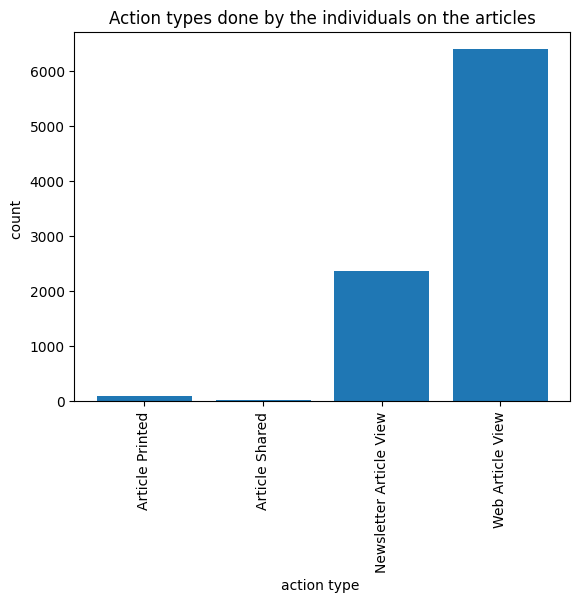

In [33]:
# ACTIONS done by INDIVIDUALS

# Some genre statistic to explore what genre was most filmed in which year
actions=data1['action_type'].value_counts()[data1['action_type'].value_counts()>1]##more than 1%-we will display just most rewied gesres
actions=pd.DataFrame(actions)
actions['action_type'] = actions.index
action_reduced = pd.merge(actions, data1, on="action_type")
Action = [Action for Action, df in action_reduced.groupby(['action_type'])]
plt.bar(Action,action_reduced.groupby(['action_type']).count()['individual_id'])
plt.xticks(Action, rotation='vertical', size=10)
plt.title('Action types done by the individuals on the articles')
plt.ylabel('count ')
plt.xlabel('action type ')
plt.show()


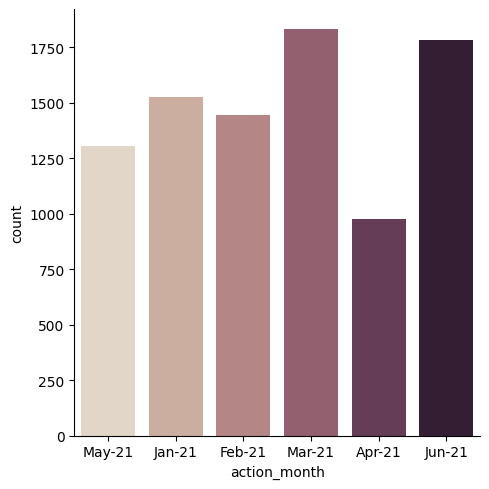

In [34]:
sns.catplot(data=data1, x="action_month", kind="count", palette="ch:.25")

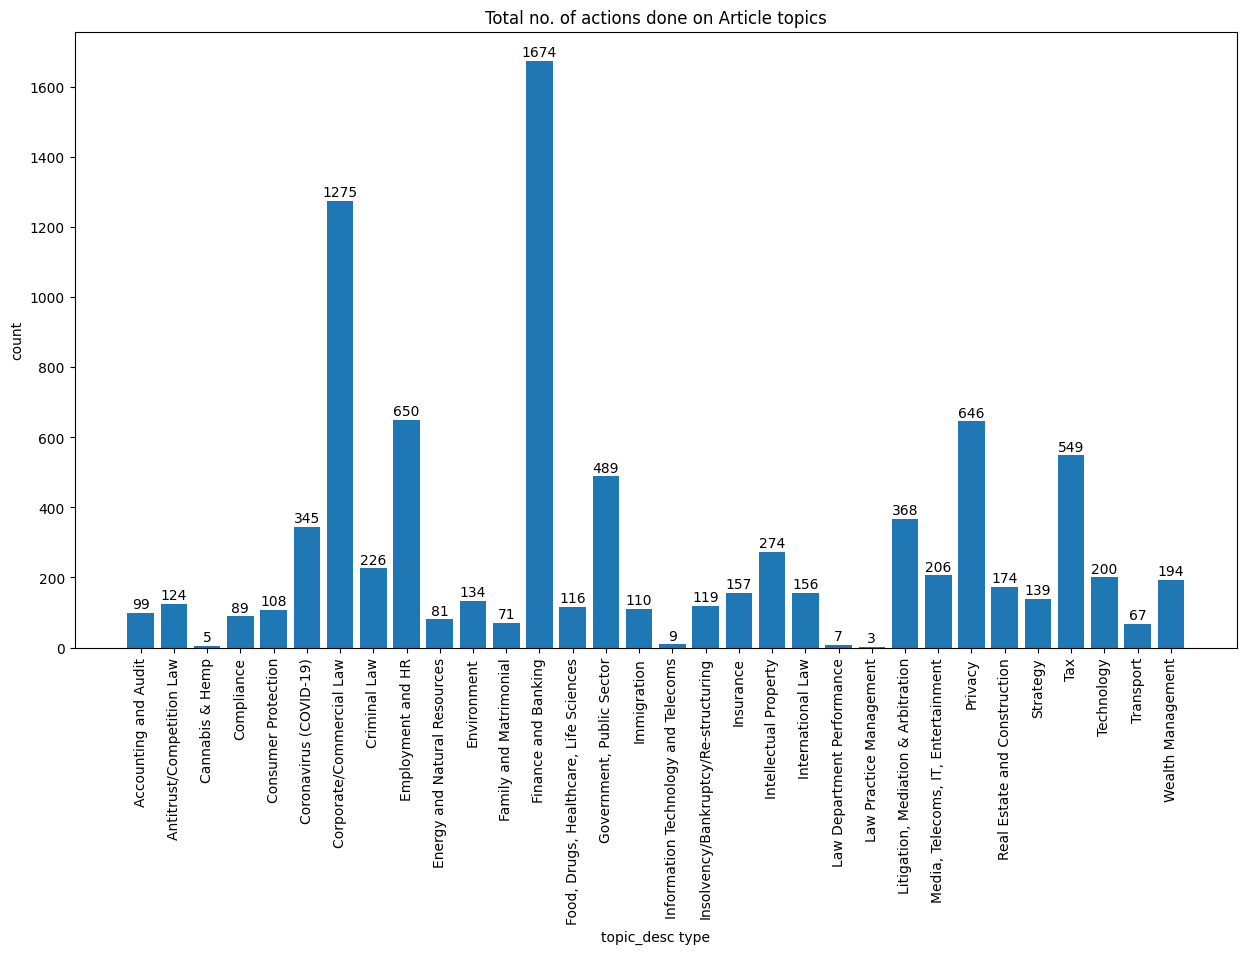

In [35]:
# ARTICLE TOPICS

# Some article_topic statistic to explore what topics that was most viewed in 6 months
types=data1['topic_desc'].value_counts()[data1['topic_desc'].value_counts()>1]
types=pd.DataFrame(types)
types['topic_desc'] = types.index
genre_reduced = pd.merge(types, data1, on="topic_desc")
Genre = [Genre for Genre, df in genre_reduced.groupby(['topic_desc'])]
plt.figure(figsize=(15,8))
ax = plt.bar(Genre,genre_reduced.groupby(['topic_desc']).count()['action_type'])
plt.xticks(Genre, rotation='vertical', size=10) #ax.set_xticklabels(('Male', 'Female'))
plt.title("Total no. of actions done on Article topics", y=1)
plt.xlabel('topic_desc type')
plt.ylabel('count')
#plt.show()

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    plt.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

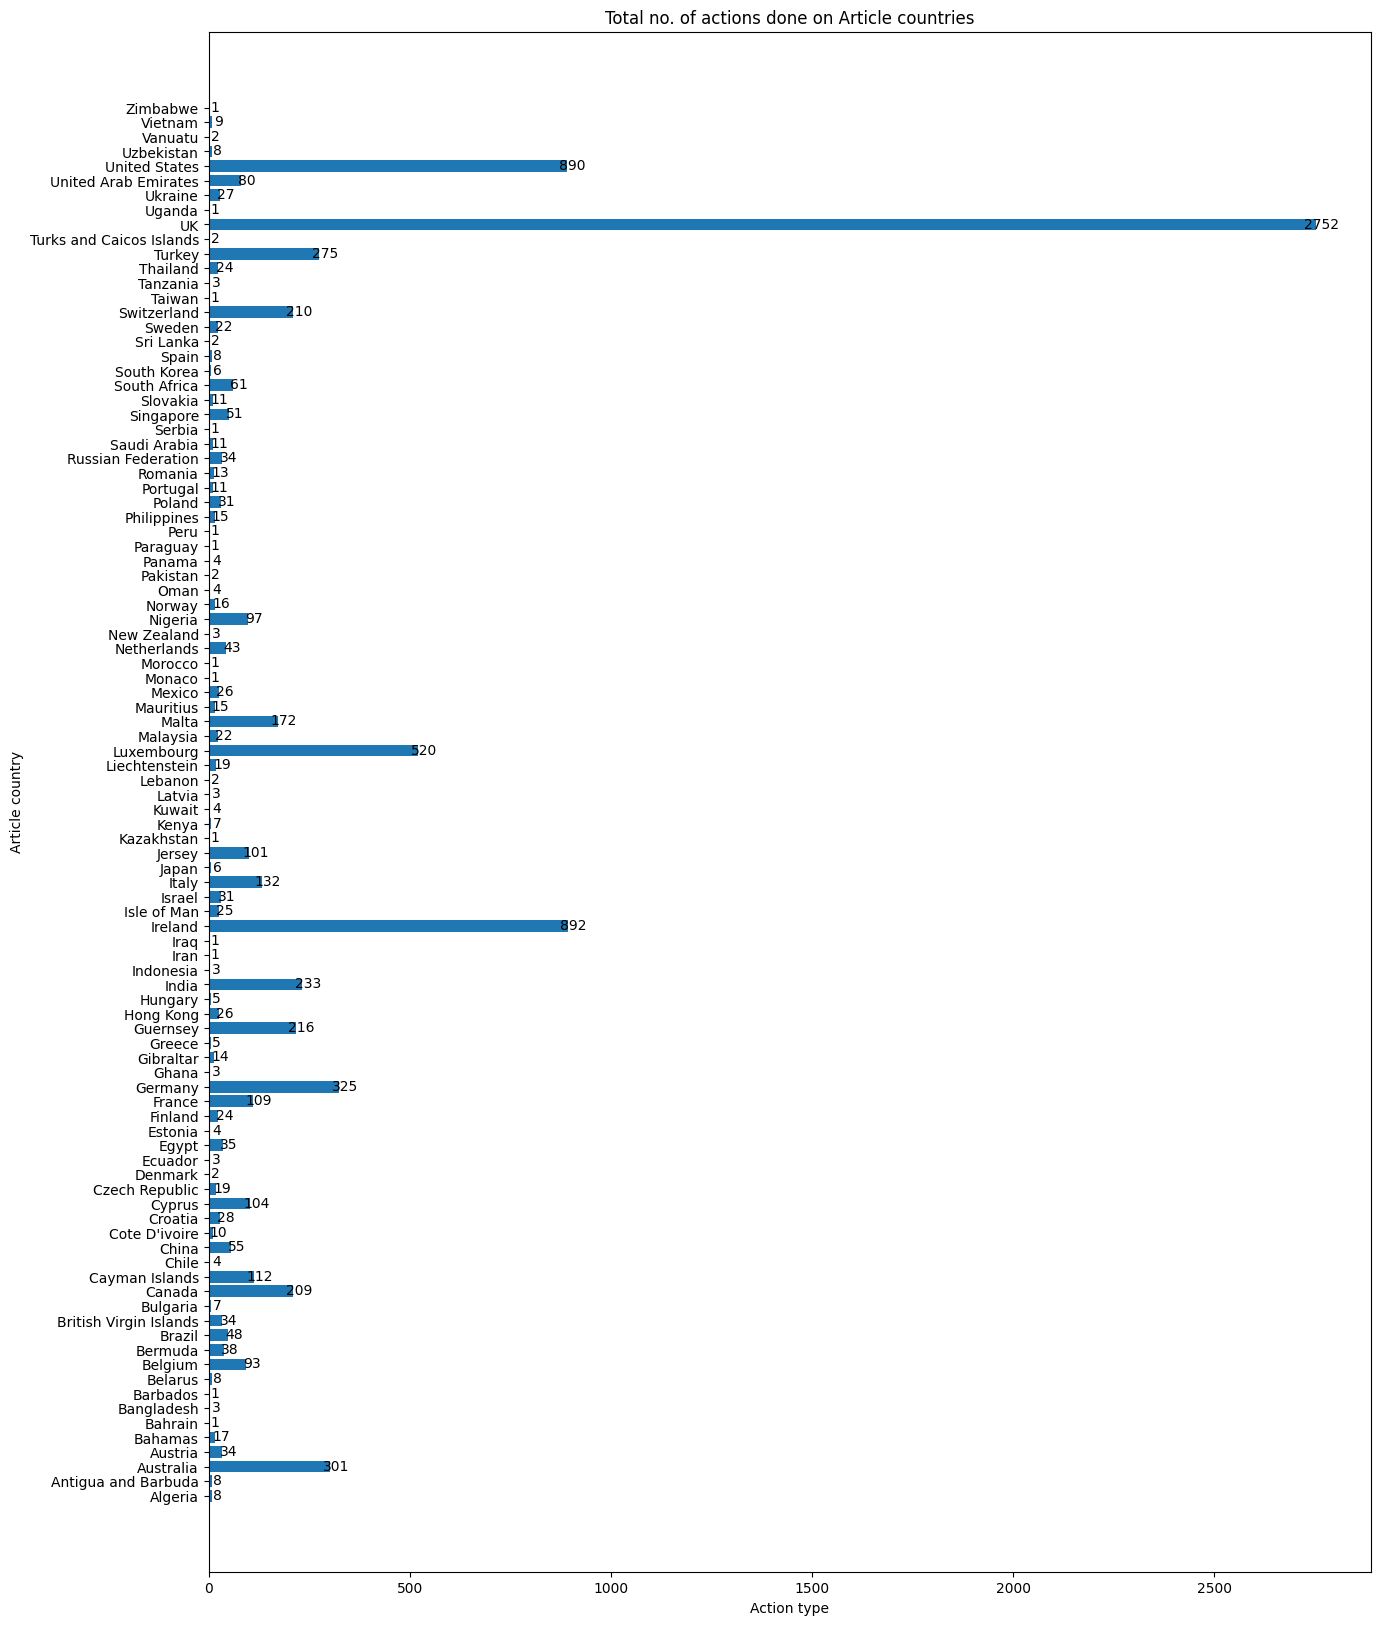

In [36]:
# ARTICLE COUNTRY

types=data1['article_country'].value_counts()[data1['article_country'].value_counts()>0]
types=pd.DataFrame(types)
types['article_country'] = types.index
country_reduced = pd.merge(types, data1, on="article_country")
Country = [Country for Country, df in country_reduced.groupby(['article_country'])]
plt.figure(figsize=(15,20)) 
ax = plt.barh(Country,country_reduced.groupby(['article_country']).count()['action_type'])
# Annotate every single Bar with its value, based on it's width           
for p in ax.patches:
    width = p.get_width()
    plt.text(15+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.0f}'.format(width),
             ha='center', va='center')
 # setting label of y-axis
plt.ylabel("Article country")

# setting label of x-axis
plt.xlabel("Action type")
plt.title("Total no. of actions done on Article countries")

plt.show()



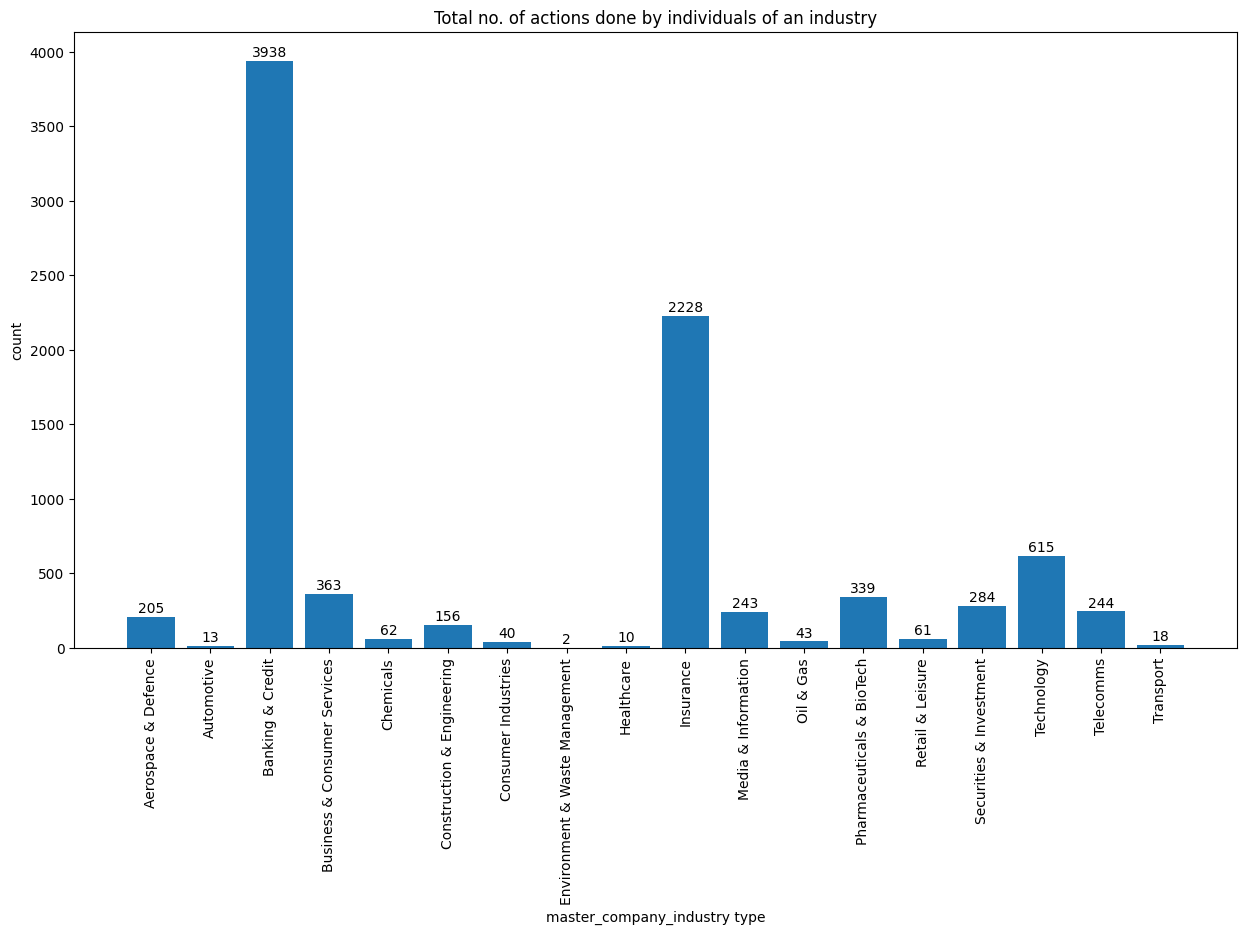

In [37]:
# INDIVIDUAL 'master_company_industry'

# Some master_company_industry statistic to explore what topics that was most viewed in 6 months
types=data1['master_company_industry'].value_counts()[data1['master_company_industry'].value_counts()>0]
types=pd.DataFrame(types)
types['master_company_industry'] = types.index
industry_reduced = pd.merge(types, data1, on="master_company_industry")
Industry = [Industry for Industry, df in industry_reduced.groupby(['master_company_industry'])]
plt.figure(figsize=(15,8))
ax = plt.bar(Industry,industry_reduced.groupby(['master_company_industry']).count()['action_type'])
plt.xticks(Industry, rotation='vertical', size=10) #ax.set_xticklabels(('Male', 'Female'))
plt.title("Total no. of actions done by individuals of an industry", y=1)
plt.xlabel('master_company_industry type')
plt.ylabel('count')
#plt.show()

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    plt.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

# Data Preprocessing

## Aggregation based on individuals

In [39]:
# action month

action_df = pd.pivot_table(data = data1, 
                             values =['action_type'], 
                             index=['individual_id'], 
                             columns=['action_month'],
                             aggfunc = 'count', 
                             fill_value=0, 
                             margins = False).reindex()
action_df.head(20)

action_type                                   
action_month       Apr-21 Feb-21 Jan-21 Jun-21 Mar-21 May-21
individual_id                                               
91743                   0      0      3      0      0      0
219291                  4      0      0      0     12      4
308143                 34     27     67     12     64     15
329275                  0      0      0      0      2      0
360032                  0      0      4      0      7      0
391954                  8      8     10     16     12     12
397974                  0      0      2      0      0      0
449050                  0      0      2      0      2      0
493210                  0      0      0      6      0      0
493220                  0      0      2      3      3      2
502944                 51     78     90    132    110    122
533806                 35     32     12     39     33      6
538762                 35      0      1      4      2     14
566432                  5      0      0      5      0      0
579992                 24      9      3     21      7      4
658020                  4      3      0      0      0      0
666034                  3      5      2      6     10      0
691540                  0      0      0      2      0      0
694290                 44     87     90     63    125     82
705192                  6     14     24     44     23      7

<AxesSubplot: xlabel='None-action_month', ylabel='None-action_month'>

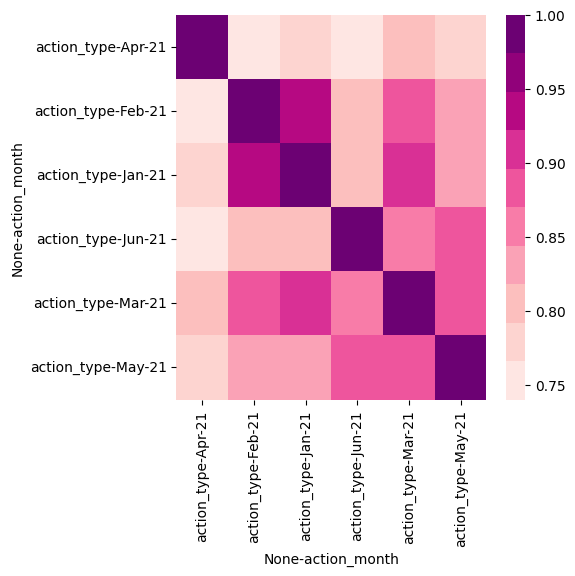

In [40]:
fig, ax = plt.subplots(figsize=(5,5))         
sns.heatmap(action_df.corr(),
            # cmap="YlGnBu",
            cmap= sns.color_palette("RdPu", 10),
            ax=ax)

In [41]:
#action_df.info()

In [43]:
# article country

country_df = pd.pivot_table(data = data1, 
                             values =['action_type'], 
                             index=['individual_id'], 
                             columns=['article_country'],
                             aggfunc = 'count', 
                             fill_value=0, 
                             margins = False).reindex()
country_df.head(20)

action_type                                                \
article_country     Algeria Antigua and Barbuda Australia Austria Bahamas   
individual_id                                                               
91743                     0                   0         0       0       0   
219291                    0                   0         0       0       0   
308143                    0                   0         4       0       0   
329275                    0                   0         0       0       0   
360032                    0                   0         0       0       0   
391954                    0                   0         0       0       0   
397974                    0                   0         0       0       0   
449050                    0                   0         0       0       0   
493210                    0                   0         0       0       0   
493220                    0                   0         0       0       0   
502944                    0                   6         6       0      10   
533806                    0                   0         0       0       0   
538762                    0                   0         0       0       0   
566432                    0                   0         0       0       0   
579992                    0                   0         0       0       0   
658020                    0                   0         0       0       0   
666034                    0                   0         0       0       0   
691540                    0                   0         0       0       0   
694290                    0                   0        13       0       2   
705192                    0                   0        14       0       0   

                                                             ...  \
article_country Bahrain Bangladesh Barbados Belarus Belgium  ...   
individual_id                                                ...   
91743                 0          0        0       0       0  ...   
219291                0          0        0       0       0  ...   
308143                0          0        0       0       0  ...   
329275                0          0        0       0       0  ...   
360032                0          0        0       0       0  ...   
391954                0          0        0       0       0  ...   
397974                0          0        0       0       0  ...   
449050                0          0        0       0       0  ...   
493210                0          0        0       0       0  ...   
493220                0          0        0       0       0  ...   
502944                0          0        0       0       3  ...   
533806                0          0        0       0       0  ...   
538762                0          0        0       0       0  ...   
566432                0          0        0       0       0  ...   
579992                0          0        0       0       0  ...   
658020                0          0        0       0       0  ...   
666034                0          0        0       0       0  ...   
691540                0          0        0       0       0  ...   
694290                0          3        0       0       2  ...   
705192                0          0        0       0       5  ...   

                                                              \
article_country Turks and Caicos Islands   UK Uganda Ukraine   
individual_id                                                  
91743                                  0    0      0       0   
219291                                 0   17      0       0   
308143                                 0   86      0       0   
329275                                 0    2      0       0   
360032                                 0    0      0       0   
391954                                 0   64      0       0   
397974                                 0    0      0       0   
449050                                 

In [44]:
# article primary topic

topic_df = pd.pivot_table(data = data1, 
                        values=['action_type'], 
                        index=['individual_id'], 
                        columns=['topic_desc'],
                        aggfunc = 'count', 
                        fill_value=0, 
                        margins = False).reindex()
topic_df.head(10)

action_type                                            \
topic_desc    Accounting and Audit Antitrust/Competition Law Cannabis & Hemp   
individual_id                                                                  
91743                            0                         0               0   
219291                           0                         1               0   
308143                           3                         2               0   
329275                           0                         0               0   
360032                           0                         0               0   
391954                           0                         0               0   
397974                           0                         0               0   
449050                           0                         0               0   
493210                           0                         0               0   
493220                           0                         1               0   

                                                                     \
topic_desc    Compliance Consumer Protection Coronavirus (COVID-19)   
individual_id                                                         
91743                  0                   0                      1   
219291                 0                   0                      5   
308143                 3                   2                      7   
329275                 0                   0                      0   
360032                 0                   0                      0   
391954                 1                   0                      8   
397974                 0                   0                      1   
449050                 0                   0                      0   
493210                 0                   0                      0   
493220                 0                   0                      0   

                                                                       \
topic_desc    Corporate/Commercial Law Criminal Law Employment and HR   
individual_id                                                           
91743                                0            0                 0   
219291                               4            1                 0   
308143                              30           19                24   
329275                               0            0                 0   
360032                               2            0                 1   
391954                               5            0                 0   
397974                               1            0                 0   
449050                               0            0                 0   
493210                               0            0                 0   
493220                               5            0                 0   

                                            ...                          \
topic_desc    Energy and Natural Resources  ... Law Practice Management   
individual_id                               ...                           
91743                                    0  ...                       0   
219291                                   0  ...                       0   
308143                                   1  ...                       0   
329275                                   0  ...                       0   
360032                                   1  ...                       0   
391954                                   0  ...                       0   
397974                                   0  ...                       0   
449050                                   0  ...                       0   
493210                                   0  ...                       0   
493220                                   0  ...                       0   

                                                   \
topic_desc    Litigation, Mediation & Arbitration   
individual_id             

In [45]:
# Import the primary_data 

industry_data = pd.read_csv('industry.csv',encoding='unicode_escape')

industry_data. rename(columns={'ï»¿action_date':'action_date'}, inplace=True) # rename action_date from 'ï»¿action_date' to 'action_date'

# preview of the dataset
industry_data.head()

,action_date,action_month,article_id,article_country_id,article_country,article_primary_topic_id,article_primary_topic,action_type,individual_id,individual_country_id,individual_country,company_id,master_company_id,master_company_industry_id,master_company_industry
0,12/05/2021 18:46,May-21,195166,223,UK,20,Strategy,Web Article View,1130774,223,UK,50946,40,3,Aerospace & Defence
1,18/03/2021 10:09,Mar-21,1047488,241,Jersey,5,Employment and HR,Newsletter Article View,2091064,223,UK,289563,248,3,Aerospace & Defence
2,29/06/2021 12:53,Jun-21,1015632,223,UK,19,Immigration,Web Article View,2455540,223,UK,19416,15,3,Aerospace & Defence
3,24/06/2021 13:46,Jun-21,1081074,138,Mexico,21,Transport,Newsletter Article View,1559990,223,UK,195299,185,4,Automotive
4,11/03/2021 15:48,Mar-21,939334,104,Ireland,21,Transport,Web Article View,1142916,223,UK,53181,45,5,Banking & Credit


In [46]:
# individual industry

industry_df = pd.pivot_table(data = industry_data, 
                             values =['action_type'], 
                             index=['individual_id'], 
                             columns=['master_company_industry'],
                             aggfunc = 'count', 
                             fill_value=0, 
                             margins = False).reindex()
industry_df.head(20)

action_type                              \
master_company_industry Aerospace & Defence Automotive Banking & Credit   
individual_id                                                             
91743                                     0          0                0   
219291                                    0          0                1   
308143                                    0          0                0   
329275                                    0          0                0   
360032                                    0          0                0   
391954                                    0          0                0   
397974                                    0          0                0   
449050                                    0          0                0   
493210                                    0          0                0   
493220                                    0          0                0   
502944                                    0          0                1   
533806                                    0          0                0   
538762                                    0          0                1   
566432                                    0          0                0   
579992                                    0          0                0   
658020                                    0          0                0   
666034                                    0          0                0   
691540                                    0          0                1   
694290                                    0          0                1   
705192                                    0          0                0   

                                                                \
master_company_industry Business & Consumer Services Chemicals   
individual_id                                                    
91743                                              0         0   
219291                                             0         0   
308143                                             0         0   
329275                                             0         0   
360032                                             0         0   
391954                                             0         0   
397974                                             0         0   
449050                                             0         0   
493210                                             0         0   
493220                                             0         0   
502944                                             0         0   
533806                                             0         0   
538762                                             0         0   
566432                                             0         0   
579992                                             0         0   
658020                                             0         0   
666034                                             0         0   
691540                                             0         0   
694290                                             0         0   
705192                                             0         0   

                                                                        \
master_company_industry Construction & Engineering Consumer Industries   
individual_id                                                            
91743                                            0                   0   
219291                                           0                   0   
308143                                           0                   0   
329275                                           0                   0   
360032                                           0                   0   
391954                                           0                   0   
397974                                           0                   0   
449050                                         

In [47]:
# article country

subscriber_df = pd.pivot_table(data = news_df, 
                             values =['action_type'], 
                             index=['individual_id'], 
                             columns=['sub_topic_desc'],
                             aggfunc = 'count', 
                             fill_value=0, 
                             margins = False).reindex()
subscriber_df.head(20)

action_type                              \
sub_topic_desc Accounting and Audit_s Antitrust/Competition Law_s   
individual_id                                                       
91743                               0                           0   
219291                              0                           0   
308143                              0                           0   
329275                              0                           1   
360032                              0                           0   
391954                              0                           0   
397974                              0                           0   
449050                              0                           0   
493210                              1                           0   
493220                              0                           0   
502944                              0                           0   
533806                              0                           0   
538762                              0                           0   
566432                              0                           0   
579992                              0                           0   
658020                              0                           0   
666034                              0                           0   
691540                              0                           0   
694290                              0                           0   
705192                              0                           0   

                                                                     \
sub_topic_desc Cannabis & Hemp_s Compliance_s Consumer Protection_s   
individual_id                                                         
91743                          0            0                     0   
219291                         0            0                     0   
308143                         0            0                     0   
329275                         0            0                     0   
360032                         0            0                     0   
391954                         0            1                     0   
397974                         0            0                     0   
449050                         0            0                     0   
493210                         0            0                     0   
493220                         0            0                     0   
502944                         0            0                     0   
533806                         0            0                     0   
538762                         0            0                     0   
566432                         0            0                     0   
579992                         0            0                     0   
658020                         0            0                     0   
666034                         0            0                     0   
691540                         0            0                     0   
694290                         0            0                     0   
705192                         0            0                     0   

                                                                    \
sub_topic_desc Coronavirus (COVID-19)_s Corporate/Commercial Law_s   
individual_id                                                        
91743                                 0                          0   
219291                                0                          0   
308143                                0                          0   
329275                                0                          0   
360032                                0                          0   
391954                                0                          0   
397974                                0                          0   
449050                                0                          0   
493210                            

In [48]:
# subscriber_df.shape

In [49]:
result_df = pd.concat([action_df,country_df, topic_df, industry_df, subscriber_df], axis=1)
result_df

action_type                                             \
action_month       Apr-21 Feb-21 Jan-21 Jun-21 Mar-21 May-21 Algeria   
individual_id                                                          
91743                   0      0      3      0      0      0       0   
219291                  4      0      0      0     12      4       0   
308143                 34     27     67     12     64     15       0   
329275                  0      0      0      0      2      0       0   
360032                  0      0      4      0      7      0       0   
...                   ...    ...    ...    ...    ...    ...     ...   
2413862                 0      0      0     10      0      0       0   
2423386                 0      0      0      3      0      0       0   
2450416                 0      0      0      7      0      0       0   
2453062                 0      0      0      4      0      0       0   
2455540                 0      0      0      2      0      0       0   

                                                     ...  \
action_month  Antigua and Barbuda Australia Austria  ...   
individual_id                                        ...   
91743                           0         0       0  ...   
219291                          0         0       0  ...   
308143                          0         4       0  ...   
329275                          0         0       0  ...   
360032                          0         0       0  ...   
...                           ...       ...     ...  ...   
2413862                         0         0       0  ...   
2423386                         0         0       0  ...   
2450416                         0         0       0  ...   
2453062                         0         0       0  ...   
2455540                         0         0       0  ...   

                                                     \
action_month  Litigation, Mediation & Arbitration_s   
individual_id                                         
91743                                             0   
219291                                            0   
308143                                            0   
329275                                            0   
360032                                            0   
...                                             ...   
2413862                                           0   
2423386                                           0   
2450416                                           0   
2453062                                           0   
2455540                                           0   

                                                                             \
action_month  Media, Telecoms, IT, Entertainment_s Non subscriber Privacy_s   
individual_id                                                                 
91743                                            0              0         0   
219291                                           0              1         0   
308143                                           0              1         0   
329275                                           0              0         0   
360032                                           0              1         0   
...                                            ...            ...       ...   
2413862                                          0              0         0   
2423386                                          0              0         0   
2450416                                          0              1         0   
2453062                                          0              0         0   
2455540                                          0              0         0   

                                                                            \
action_month  Real Estate and Construction_s Strategy_s Tax_s Technology_s   
individual_id                                                                
91743                                      0        

In [50]:
result_df.shape

#6months+96countrie+32topics+18industry= 152 columns

(153, 184)

In [51]:
result_df.dtypes

             action_month       
action_type  Apr-21                 int64
             Feb-21                 int64
             Jan-21                 int64
             Jun-21                 int64
             Mar-21                 int64
                                    ...  
             Strategy_s             int64
             Tax_s                  int64
             Technology_s           int64
             Transport_s            int64
             Wealth Management_s    int64
Length: 184, dtype: object

In [52]:
data_f = result_df.copy()
data_m = result_df.copy()
data_q = result_df.copy()

In [53]:
data_f.describe()

action_type                                                  \
action_month      Apr-21      Feb-21      Jan-21      Jun-21      Mar-21   
count         153.000000  153.000000  153.000000  153.000000  153.000000   
mean            6.372549    9.431373    9.973856   11.647059   11.967320   
std            12.113978   26.148051   25.088252   29.312399   28.171098   
min             0.000000    0.000000    0.000000    0.000000    0.000000   
25%             0.000000    0.000000    0.000000    0.000000    0.000000   
50%             0.000000    0.000000    1.000000    1.000000    2.000000   
75%             7.000000    4.000000    6.000000    8.000000   12.000000   
max            60.000000  191.000000  191.000000  211.000000  193.000000   

                                                                      \
action_month      May-21     Algeria Antigua and Barbuda   Australia   
count         153.000000  153.000000          153.000000  153.000000   
mean            8.542484    0.052288            0.052288    1.967320   
std            23.922844    0.646762            0.510300   10.377999   
min             0.000000    0.000000            0.000000    0.000000   
25%             0.000000    0.000000            0.000000    0.000000   
50%             0.000000    0.000000            0.000000    0.000000   
75%             4.000000    0.000000            0.000000    0.000000   
max           161.000000    8.000000            6.000000  120.000000   

                          ...                                        \
action_month     Austria  ... Litigation, Mediation & Arbitration_s   
count         153.000000  ...                            153.000000   
mean            0.222222  ...                              0.065359   
std             0.897527  ...                              0.247971   
min             0.000000  ...                              0.000000   
25%             0.000000  ...                              0.000000   
50%             0.000000  ...                              0.000000   
75%             0.000000  ...                              0.000000   
max             6.000000  ...                              1.000000   

                                                                              \
action_month Media, Telecoms, IT, Entertainment_s Non subscriber   Privacy_s   
count                                  153.000000     153.000000  153.000000   
mean                                     0.052288       0.287582    0.111111   
std                                      0.223337       0.454122    0.315302   
min                                      0.000000       0.000000    0.000000   
25%                                      0.000000       0.000000    0.000000   
50%                                      0.000000       0.000000    0.000000   
75%                                      0.000000       1.000000    0.000000   
max                                      1.000000       1.000000    1.000000   

                                                                     \
action_month Real Estate and Construction_s  Strategy_s       Tax_s   
count                            153.000000  153.000000  153.000000   
mean                               0.045752    0.013072    0.143791   
std                                0.209632    0.113956    0.352030   
min                                0.000000    0.000000    0.000000   
25%                                0.000000    0.000000    0.000000   
50%                                0.000000    0.000000    0.000000   
75%                                0.000000    0.000000    0.000000   
max                                1.000000    1.000000    1.000000   

                                                           
action_month Technology_s Transport_s Wealth Management_s  
count          153.000000  153.000000          153.000000  
mean             0.052288    0.052288            0.071895  
std              0.223337    0.223337            0.259163  
min     

# Feature Scaling

## MinMax Scaling

In [54]:
# perfect
from sklearn.preprocessing import MinMaxScaler

def scaling_func(data_m: pd.DataFrame) -> None:
    mms = MinMaxScaler()
    return pd.DataFrame(data=mms.fit_transform(data_m), columns=data_m.columns)


df_scaled = scaling_func(data_m)
df_scaled.index = data_m.index  # for convenient work with dataframes
#df_scaled.head(10)



In [55]:
df_scaled.describe()

action_type                                                  \
action_month      Apr-21      Feb-21      Jan-21      Jun-21      Mar-21   
count         153.000000  153.000000  153.000000  153.000000  153.000000   
mean            0.106209    0.049379    0.052219    0.055199    0.062007   
std             0.201900    0.136901    0.131352    0.138921    0.145964   
min             0.000000    0.000000    0.000000    0.000000    0.000000   
25%             0.000000    0.000000    0.000000    0.000000    0.000000   
50%             0.000000    0.000000    0.005236    0.004739    0.010363   
75%             0.116667    0.020942    0.031414    0.037915    0.062176   
max             1.000000    1.000000    1.000000    1.000000    1.000000   

                                                                      \
action_month      May-21     Algeria Antigua and Barbuda   Australia   
count         153.000000  153.000000          153.000000  153.000000   
mean            0.053059    0.006536            0.008715    0.016394   
std             0.148589    0.080845            0.085050    0.086483   
min             0.000000    0.000000            0.000000    0.000000   
25%             0.000000    0.000000            0.000000    0.000000   
50%             0.000000    0.000000            0.000000    0.000000   
75%             0.024845    0.000000            0.000000    0.000000   
max             1.000000    1.000000            1.000000    1.000000   

                          ...                                        \
action_month     Austria  ... Litigation, Mediation & Arbitration_s   
count         153.000000  ...                            153.000000   
mean            0.037037  ...                              0.065359   
std             0.149588  ...                              0.247971   
min             0.000000  ...                              0.000000   
25%             0.000000  ...                              0.000000   
50%             0.000000  ...                              0.000000   
75%             0.000000  ...                              0.000000   
max             1.000000  ...                              1.000000   

                                                                              \
action_month Media, Telecoms, IT, Entertainment_s Non subscriber   Privacy_s   
count                                  153.000000     153.000000  153.000000   
mean                                     0.052288       0.287582    0.111111   
std                                      0.223337       0.454122    0.315302   
min                                      0.000000       0.000000    0.000000   
25%                                      0.000000       0.000000    0.000000   
50%                                      0.000000       0.000000    0.000000   
75%                                      0.000000       1.000000    0.000000   
max                                      1.000000       1.000000    1.000000   

                                                                     \
action_month Real Estate and Construction_s  Strategy_s       Tax_s   
count                            153.000000  153.000000  153.000000   
mean                               0.045752    0.013072    0.143791   
std                                0.209632    0.113956    0.352030   
min                                0.000000    0.000000    0.000000   
25%                                0.000000    0.000000    0.000000   
50%                                0.000000    0.000000    0.000000   
75%                                0.000000    0.000000    0.000000   
max                                1.000000    1.000000    1.000000   

                                                           
action_month Technology_s Transport_s Wealth Management_s  
count          153.000000  153.000000          153.000000  
mean             0.052288    0.052288            0.071895  
std              0.223337    0.223337            0.259163  
min     

# RobustScaler

In [56]:
from sklearn.preprocessing import RobustScaler

def scaling_func2(data_f: pd.DataFrame) -> None:
    r_scaler = RobustScaler()
    return pd.DataFrame(data=r_scaler.fit_transform(data_f), columns=data_f.columns)


scaled_df1 = scaling_func2(data_f)
scaled_df1.index = data_f.index  # for convenient work with dataframes
#scaled_df1.head(5)

In [57]:
scaled_df1.describe()

action_type                                                  \
action_month      Apr-21      Feb-21      Jan-21      Jun-21      Mar-21   
count         153.000000  153.000000  153.000000  153.000000  153.000000   
mean            0.910364    2.357843    1.495643    1.330882    0.830610   
std             1.730568    6.537013    4.181375    3.664050    2.347592   
min             0.000000    0.000000   -0.166667   -0.125000   -0.166667   
25%             0.000000    0.000000   -0.166667   -0.125000   -0.166667   
50%             0.000000    0.000000    0.000000    0.000000    0.000000   
75%             1.000000    1.000000    0.833333    0.875000    0.833333   
max             8.571429   47.750000   31.666667   26.250000   15.916667   

                                                                      \
action_month      May-21     Algeria Antigua and Barbuda   Australia   
count         153.000000  153.000000          153.000000  153.000000   
mean            2.135621    0.052288            0.052288    1.967320   
std             5.980711    0.646762            0.510300   10.377999   
min             0.000000    0.000000            0.000000    0.000000   
25%             0.000000    0.000000            0.000000    0.000000   
50%             0.000000    0.000000            0.000000    0.000000   
75%             1.000000    0.000000            0.000000    0.000000   
max            40.250000    8.000000            6.000000  120.000000   

                          ...                                        \
action_month     Austria  ... Litigation, Mediation & Arbitration_s   
count         153.000000  ...                            153.000000   
mean            0.222222  ...                              0.065359   
std             0.897527  ...                              0.247971   
min             0.000000  ...                              0.000000   
25%             0.000000  ...                              0.000000   
50%             0.000000  ...                              0.000000   
75%             0.000000  ...                              0.000000   
max             6.000000  ...                              1.000000   

                                                                              \
action_month Media, Telecoms, IT, Entertainment_s Non subscriber   Privacy_s   
count                                  153.000000     153.000000  153.000000   
mean                                     0.052288       0.287582    0.111111   
std                                      0.223337       0.454122    0.315302   
min                                      0.000000       0.000000    0.000000   
25%                                      0.000000       0.000000    0.000000   
50%                                      0.000000       0.000000    0.000000   
75%                                      0.000000       1.000000    0.000000   
max                                      1.000000       1.000000    1.000000   

                                                                     \
action_month Real Estate and Construction_s  Strategy_s       Tax_s   
count                            153.000000  153.000000  153.000000   
mean                               0.045752    0.013072    0.143791   
std                                0.209632    0.113956    0.352030   
min                                0.000000    0.000000    0.000000   
25%                                0.000000    0.000000    0.000000   
50%                                0.000000    0.000000    0.000000   
75%                                0.000000    0.000000    0.000000   
max                                1.000000    1.000000    1.000000   

                                                           
action_month Technology_s Transport_s Wealth Management_s  
count          153.000000  153.000000          153.000000  
mean             0.052288    0.052288            0.071895  
std              0.223337    0.223337            0.259163  
min     

# Quantile Transformer

In [58]:
from sklearn.preprocessing import QuantileTransformer

def scaling_func3(data_q: pd.DataFrame) -> None:
    q_scaler = QuantileTransformer(n_quantiles=100) # output_distribution='uniform'-default, normal
    return pd.DataFrame(data=q_scaler.fit_transform(data_q), columns=data_q.columns)


scaled_df2 = scaling_func3(data_q)
scaled_df2.index = data_q.index  # for convenient work with dataframes
#scaled_df2.head(5)

In [59]:
scaled_df2.describe()

action_type                                                  \
action_month      Apr-21      Feb-21      Jan-21      Jun-21      Mar-21   
count         153.000000  153.000000  153.000000  153.000000  153.000000   
mean            0.346362    0.331066    0.384108    0.380630    0.392884   
std             0.398024    0.399577    0.388127    0.389124    0.384201   
min             0.000000    0.000000    0.000000    0.000000    0.000000   
25%             0.000000    0.000000    0.000000    0.000000    0.000000   
50%             0.000000    0.000000    0.510101    0.510101    0.530303   
75%             0.754717    0.752525    0.757576    0.747475    0.757576   
max             1.000000    1.000000    1.000000    1.000000    1.000000   

                                                                      \
action_month      May-21     Algeria Antigua and Barbuda   Australia   
count         153.000000  153.000000          153.000000  153.000000   
mean            0.339099    0.006536            0.013020    0.150531   
std             0.399199    0.080845            0.113503    0.342263   
min             0.000000    0.000000            0.000000    0.000000   
25%             0.000000    0.000000            0.000000    0.000000   
50%             0.000000    0.000000            0.000000    0.000000   
75%             0.732323    0.000000            0.000000    0.000000   
max             1.000000    1.000000            1.000000    1.000000   

                          ...                                        \
action_month     Austria  ... Litigation, Mediation & Arbitration_s   
count         153.000000  ...                            153.000000   
mean            0.075676  ...                              0.065359   
std             0.260328  ...                              0.247971   
min             0.000000  ...                              0.000000   
25%             0.000000  ...                              0.000000   
50%             0.000000  ...                              0.000000   
75%             0.000000  ...                              0.000000   
max             1.000000  ...                              1.000000   

                                                                              \
action_month Media, Telecoms, IT, Entertainment_s Non subscriber   Privacy_s   
count                                  153.000000     153.000000  153.000000   
mean                                     0.052288       0.287582    0.111111   
std                                      0.223337       0.454122    0.315302   
min                                      0.000000       0.000000    0.000000   
25%                                      0.000000       0.000000    0.000000   
50%                                      0.000000       0.000000    0.000000   
75%                                      0.000000       1.000000    0.000000   
max                                      1.000000       1.000000    1.000000   

                                                                     \
action_month Real Estate and Construction_s  Strategy_s       Tax_s   
count                            153.000000  153.000000  153.000000   
mean                               0.045752    0.013072    0.143791   
std                                0.209632    0.113956    0.352030   
min                                0.000000    0.000000    0.000000   
25%                                0.000000    0.000000    0.000000   
50%                                0.000000    0.000000    0.000000   
75%                                0.000000    0.000000    0.000000   
max                                1.000000    1.000000    1.000000   

                                                           
action_month Technology_s Transport_s Wealth Management_s  
count          153.000000  153.000000          153.000000  
mean             0.052288    0.052288            0.071895  
std              0.223337    0.223337            0.259163  
min     

# Dimensionality Reduction

# To check PCA variation percentages

### Min-max scaled data variance

In [60]:
# 95% variations
pca_1 = PCA(n_components = 0.95)
pca_1.fit(df_scaled)
reduced_data_m1 = pd.DataFrame(pca_1.transform(df_scaled))

print("Current number of features= ",len(reduced_data_m1.columns))

Current number of features=  52


In [61]:
# 75% variations

from sklearn.preprocessing import MinMaxScaler as ms
mst = ms().fit_transform(df_scaled)
pca1 = PCA(0.75)
pc = pca1.fit_transform(mst) # << to retain the components in an object
pc
#pca.explained_variance_ratio_
print ( "Components = ", pca1.n_components_ , ";\nTotal explained variance = ",
      round(pca1.explained_variance_ratio_.sum(),5)  )

Components =  23 ;
Total explained variance =  0.75858


### RobustScaled data variations

In [62]:
# 95% variations

pca_2 = PCA(n_components = 0.95)
pca_2.fit(scaled_df1)
reduced_data_s1 = pd.DataFrame(pca_2.transform(scaled_df1))

print("Current number of features= ",len(reduced_data_s1.columns))

Current number of features=  13


In [63]:
# 80% variations

from sklearn.preprocessing import RobustScaler as rs
rt = rs().fit_transform(scaled_df1)
pca2 = PCA(0.80)
pc1 = pca2.fit_transform(rt) # << to retain the components in an object
pc1

#pca.explained_variance_ratio_
print ( "Components = ", pca2.n_components_ , ";\nTotal explained variance = ",
      round(pca2.explained_variance_ratio_.sum(),5)  )

Components =  5 ;
Total explained variance =  0.80141


### Quantile Scaled data variations

In [64]:
# 95% variations

pca_3 = PCA(n_components = 0.95)
pca_3.fit(scaled_df2)
reduced_data_s2 = pd.DataFrame(pca_3.transform(scaled_df2))

print("Current number of features= ",len(reduced_data_s2.columns))

Current number of features=  67


In [65]:
# 75% variations

from sklearn.preprocessing import QuantileTransformer as qt 

qts = qt().fit_transform(scaled_df2)
pca3 = PCA(0.75)
pc2 = pca3.fit_transform(qts) # << to retain the components in an object
pc2

#pca.explained_variance_ratio_
print ( "Components = ", pca3.n_components_ , ";\nTotal explained variance = ",
      round(pca3.explained_variance_ratio_.sum(),5))

Components =  28 ;
Total explained variance =  0.75444


/opt/anaconda3/envs/python310/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2583: UserWarning: n_quantiles (1000) is greater than the total number of samples (153). n_quantiles is set to n_samples.


## PCA ( Robust Scaling )

In [69]:
def dim_reduction(data: pd.DataFrame) -> pd.DataFrame:
    n_components = 13
    pca_m = PCA(n_components=n_components, random_state=42)
    data = pd.DataFrame(pca_m.fit_transform(data), columns =([f'PC{i}' for i in range(1, n_components + 1)]))
    return data

df_transform = dim_reduction(scaled_df1)  # df: scaling + dimensionality reduction
df_transform.index = scaled_df1.index  # for convenient work with dataframes
df_transform.describe().T


,count,mean,std,min,25%,50%,75%,max
PC1,153.0,7.546614e-16,33.494860,-11.629097,-11.251247,-10.172481,-5.537524,264.428972
PC2,153.0,-3.192798e-17,13.013578,-36.066825,-1.179734,-1.007734,-0.263343,148.182622
PC3,153.0,-1.422246e-15,11.242046,-68.317217,-0.000989,0.708516,1.157166,74.281464
PC4,153.0,-5.340681e-16,10.639332,-30.164111,-2.825104,-2.485509,-1.224625,94.702143
PC5,153.0,1.741526e-16,10.119020,-60.534461,-1.047765,-0.871122,-0.307009,98.583701
PC6,153.0,-7.945714e-16,9.509363,-39.821341,-1.027668,-0.827749,0.522513,78.506552
PC7,153.0,7.920317e-16,8.331231,-35.895145,-0.789610,-0.148324,0.484783,51.359057
PC8,153.0,-3.163773e-16,6.599976,-12.773437,-1.298343,-0.882865,-0.088085,59.743231
PC9,153.0,-4.375585e-16,5.391071,-16.760800,-1.003910,-0.550368,0.356449,34.884115
PC10,153.0,-5.514833e-17,4.920452,-21.424509,-0.376001,0.295661,0.700371,23.980932


In [70]:
my_model = PCA(n_components=13)

my_model.fit_transform(scaled_df1)
print (my_model.explained_variance_ratio_)
print (my_model.explained_variance_ratio_.cumsum())
#my_model = PCA(n_components=7)
#my_model.fit_transform(df_transform)

#print (my_model.explained_variance_)
#print (my_model.explained_variance_ratio_)
#print (my_model.explained_variance_ratio_.cumsum())

[0.55050722 0.08309983 0.0620151  0.05554377 0.05024393 0.04437206
 0.03405846 0.02137428 0.01426122 0.01188    0.00908369 0.00854846
 0.00682238]
[0.55050722 0.63360705 0.69562214 0.75116592 0.80140985 0.8457819
 0.87984036 0.90121464 0.91547586 0.92735587 0.93643956 0.94498801
 0.95181039]


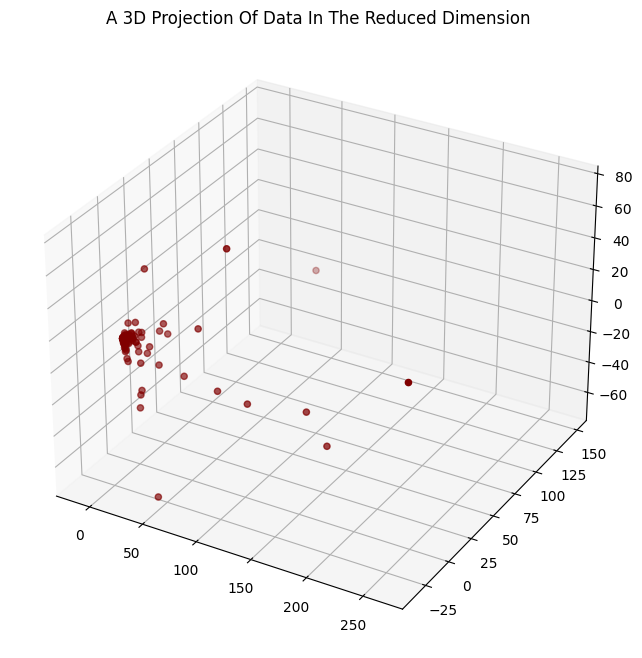

<Figure size 640x480 with 0 Axes>

In [71]:
#A 3D Projection Of Data In The Reduced Dimension
x =df_transform["PC1"]
y =df_transform["PC2"]
z =df_transform["PC3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()
plt.savefig('PCA.png')

# t-SVD

In [72]:
from sklearn.decomposition import TruncatedSVD 

svd = TruncatedSVD(n_components=3, random_state=42).fit_transform(scaled_df1.values)



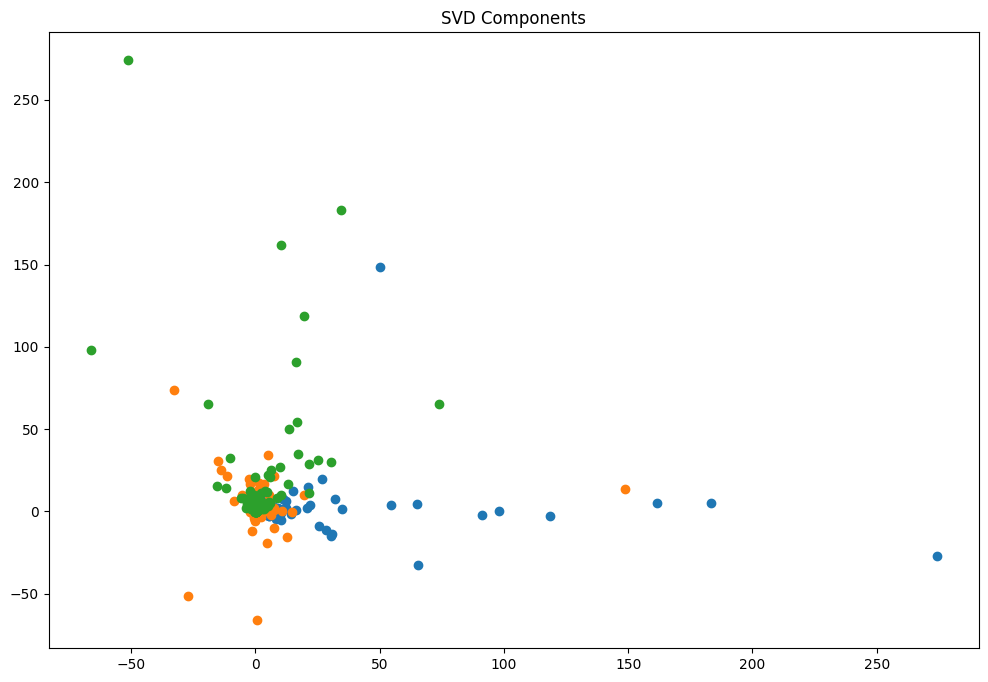

In [73]:
plt.figure(figsize=(12,8))
plt.title('SVD Components')
plt.scatter(svd[:,0], svd[:,1])
plt.scatter(svd[:,1], svd[:,2])
plt.scatter(svd[:,2],svd[:,0])

## ISO map

In [74]:
from sklearn import manifold 

trans_data = manifold.Isomap(n_neighbors=5, n_components=13, n_jobs=-1).fit_transform(scaled_df1)

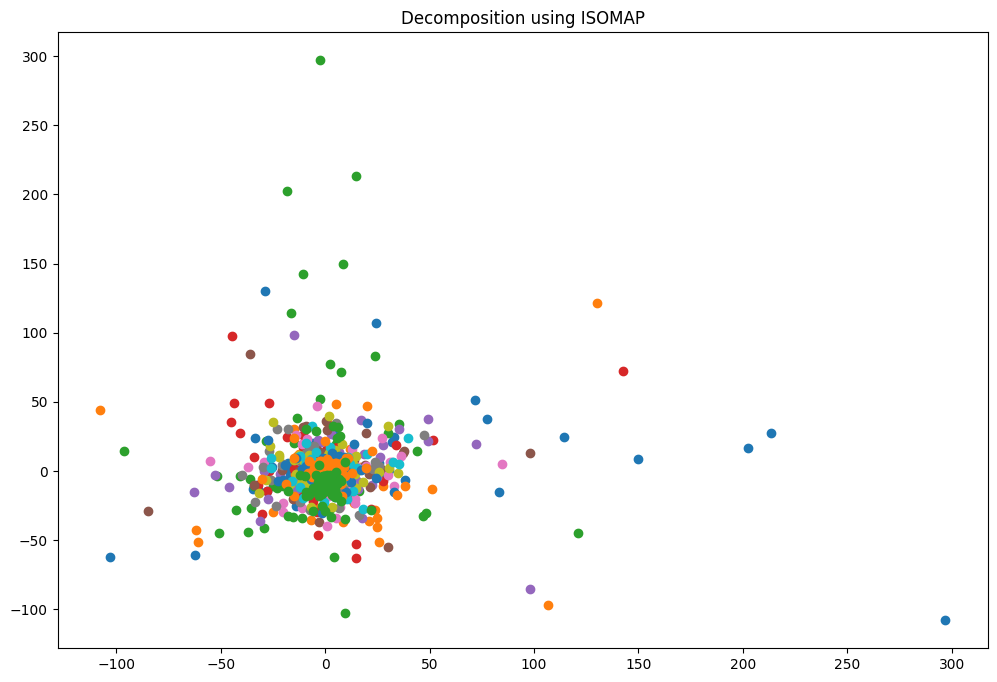

In [75]:
plt.figure(figsize=(12,8))
plt.title('Decomposition using ISOMAP')
plt.scatter(trans_data[:,0], trans_data[:,1])
plt.scatter(trans_data[:,1], trans_data[:,2])
plt.scatter(trans_data[:,2], trans_data[:,3])
plt.scatter(trans_data[:,3], trans_data[:,4])
plt.scatter(trans_data[:,4], trans_data[:,5])
plt.scatter(trans_data[:,5], trans_data[:,6])
plt.scatter(trans_data[:,6], trans_data[:,7])
plt.scatter(trans_data[:,7], trans_data[:,8])
plt.scatter(trans_data[:,8], trans_data[:,9])
plt.scatter(trans_data[:,9], trans_data[:,10])
plt.scatter(trans_data[:,10], trans_data[:,11])
plt.scatter(trans_data[:,11], trans_data[:,12])
plt.scatter(trans_data[:,12], trans_data[:,0])

## t-SNE

In [76]:
from sklearn.manifold import TSNE 

tsne = TSNE(n_components=3, n_iter=300).fit_transform(df_transform)

/opt/anaconda3/envs/python310/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
/opt/anaconda3/envs/python310/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.


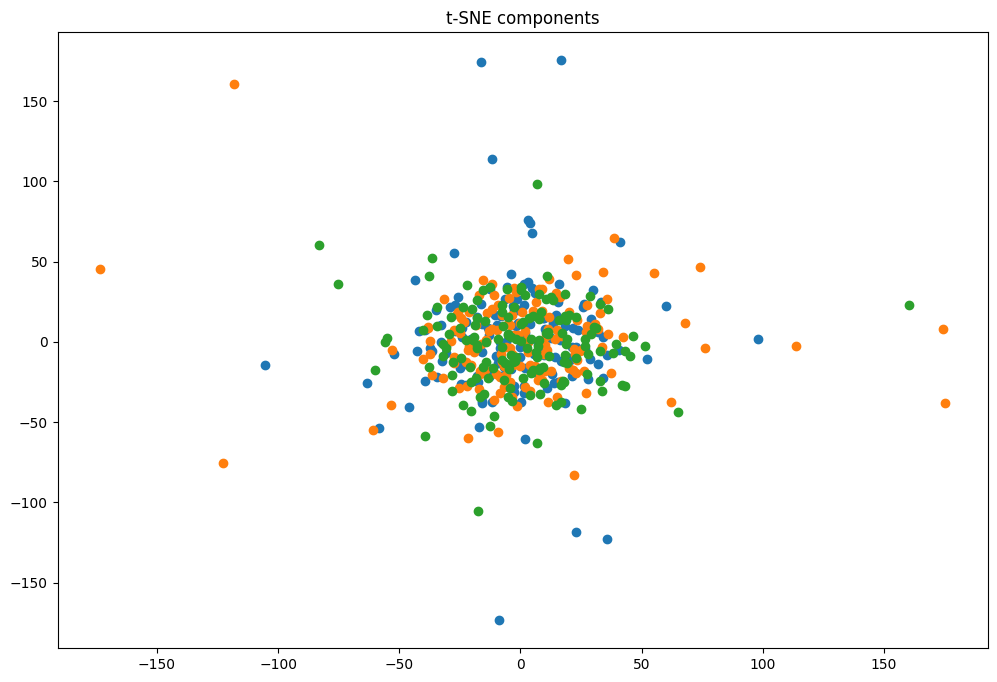

In [77]:
plt.figure(figsize=(12,8))
plt.title('t-SNE components')
plt.scatter(tsne[:,0], tsne[:,1])
plt.scatter(tsne[:,1], tsne[:,2])
plt.scatter(tsne[:,2], tsne[:,0])


## UMAP

In [78]:
#!pip install umap-learn
import umap.umap_ as umap

umap_data = umap.UMAP(n_neighbors=5, min_dist=0.5, n_components=13).fit_transform(scaled_df1)

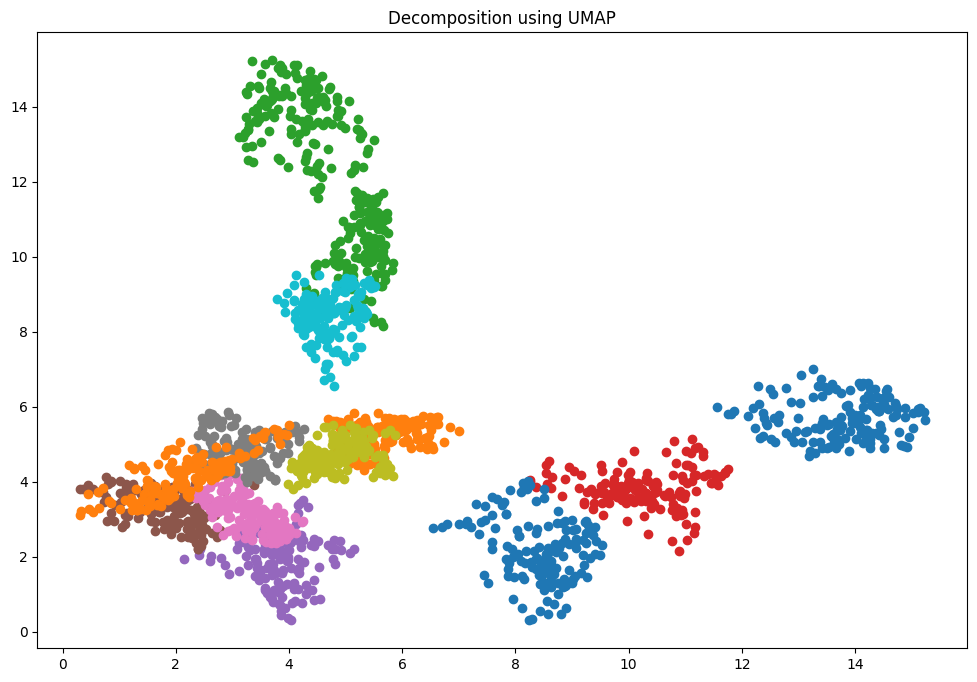

In [79]:
plt.figure(figsize=(12,8))
plt.title('Decomposition using UMAP')
plt.scatter(umap_data[:,0], umap_data[:,1])
plt.scatter(umap_data[:,1], umap_data[:,2])
plt.scatter(umap_data[:,2], umap_data[:,3])
plt.scatter(umap_data[:,3], umap_data[:,4])
plt.scatter(umap_data[:,4], umap_data[:,5])
plt.scatter(umap_data[:,5], umap_data[:,6])
plt.scatter(umap_data[:,6], umap_data[:,7])
plt.scatter(umap_data[:,7], umap_data[:,8])
plt.scatter(umap_data[:,8], umap_data[:,9])
plt.scatter(umap_data[:,9], umap_data[:,10])
plt.scatter(umap_data[:,10], umap_data[:,11])
plt.scatter(umap_data[:,11], umap_data[:,12])
plt.scatter(umap_data[:,12], umap_data[:,0])
#plt.scatter(umap_data[:,13], umap_data[:,14])
#plt.scatter(umap_data[:,14], umap_data[:,15])
#plt.scatter(umap_data[:,15], umap_data[:,16])
#plt.scatter(umap_data[:,16], umap_data[:,17])
#plt.scatter(umap_data[:,17], umap_data[:,18])
#plt.scatter(umap_data[:,18], umap_data[:,19])
#plt.scatter(umap_data[:,19], umap_data[:,20])
#plt.scatter(umap_data[:,20], umap_data[:,21])
#plt.scatter(umap_data[:,21], umap_data[:,22])
#plt.scatter(umap_data[:,22], umap_data[:,23])
#plt.scatter(umap_data[:,23], umap_data[:,24])
#plt.scatter(umap_data[:,24], umap_data[:,25])
#plt.scatter(umap_data[:,25], umap_data[:,26])
#plt.scatter(umap_data[:,26], umap_data[:,27])
#plt.scatter(umap_data[:,27], umap_data[:,0])
#plt.savefig('Umap13.png') # robust 13
#plt.savefig('Umap5.png') # robust 5
#plt.savefig('min13.png') # min max 13
#plt.savefig('min5.png') # min max 5
#plt.savefig('quantile13.png') # quantile 13
#plt.savefig('quantile5.png') # quantile 5

# Modelling

## Optimal k value

### KElbowVisualizer

Elbow Method to determine the number of clusters to be formed:


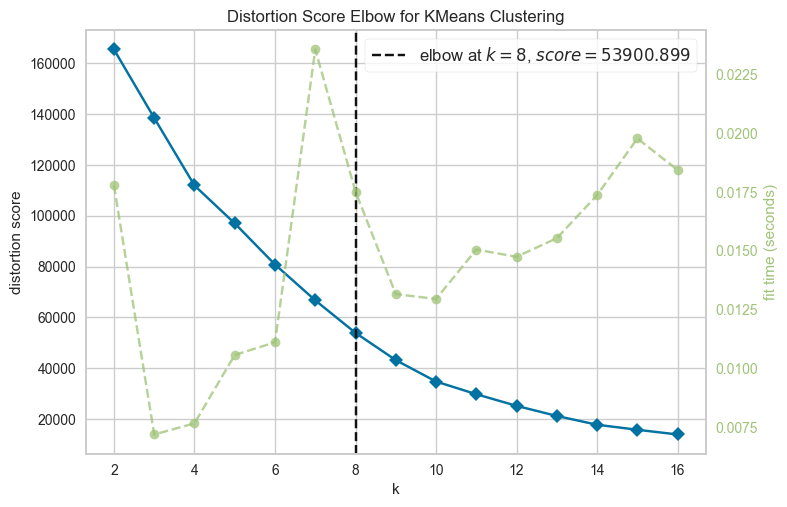

<Figure size 800x550 with 0 Axes>

In [80]:
#!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer

# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=16)
## Elbow_M.fit(PCA_df) # 6(PCA-standardised)
## Elbow_M.fit(df_transform) # 4(PCA-MinMax scaled)
## Elbow_M.fit(trans_data) # 5(iso map)
#Elbow_M.fit(tsne) # 6(t-sne)
Elbow_M.fit(df_transform) # 5(umap)
Elbow_M.show()
plt.savefig('kelbow.png')

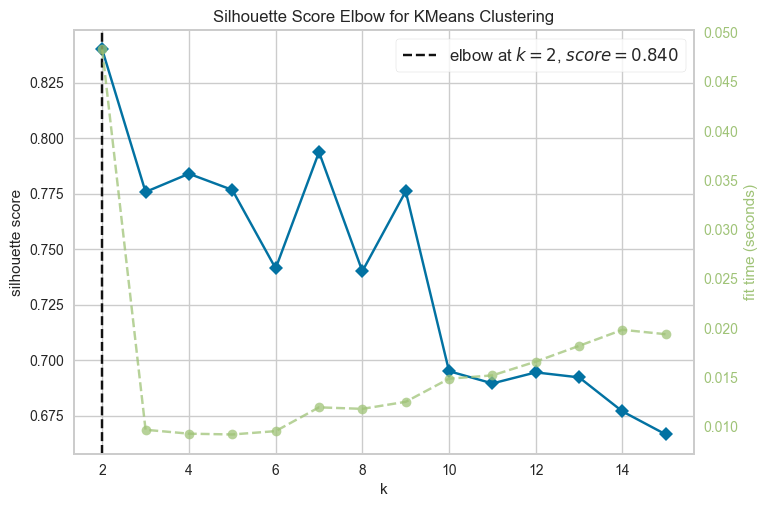

<Figure size 800x550 with 0 Axes>

In [81]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,16), metric='silhouette')

visualizer.fit(df_transform)
visualizer.show()
plt.show()
plt.savefig('silhoutte.png')

# Elbow method

In [90]:
distortions = []
K = range(2,16) # we start with 2, as we can not have 0 clusters in k means, and 1 cluster is just a dataset
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_transform)
    distortions.append(kmeanModel.inertia_)

In [82]:
plt.figure(figsize=(8,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

NameError: name 'K' is not defined

<Figure size 800x400 with 0 Axes>

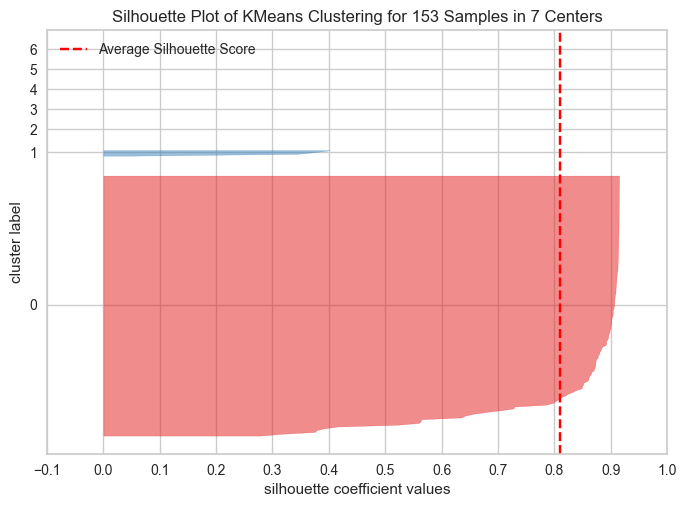

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 153 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [83]:
from yellowbrick.cluster import SilhouetteVisualizer

model_4clust = KMeans(n_clusters = 7 , random_state=42)

sil_visualizer = SilhouetteVisualizer(model_4clust)
sil_visualizer.fit(df_transform)    
sil_visualizer.show()

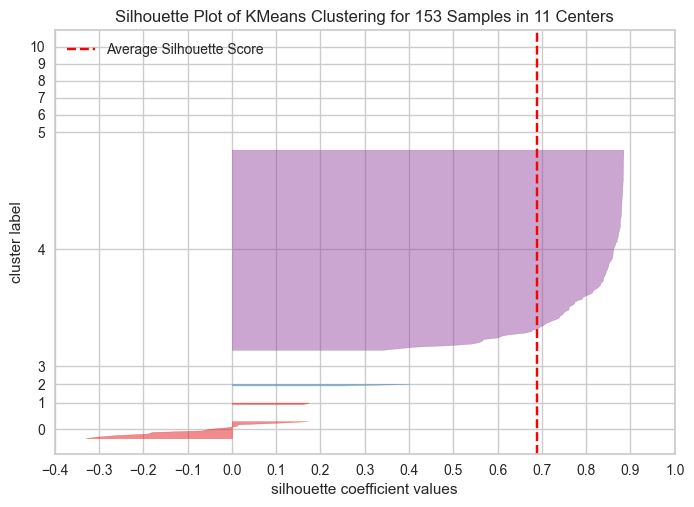

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 153 Samples in 11 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [84]:
from yellowbrick.cluster import SilhouetteVisualizer

model_4clust = KMeans(n_clusters = 11, random_state=42)

sil_visualizer = SilhouetteVisualizer(model_4clust)
sil_visualizer.fit(df_transform)    
sil_visualizer.show()

In [85]:
from sklearn.metrics import silhouette_samples, silhouette_score

model = KMeans(n_clusters= 11, init='k-means++',random_state=32)

model.fit(df_transform)

silhouette_score_average = silhouette_score(df_transform, model.predict(df_transform))

print(silhouette_score_average)

silhouette_score_individual = silhouette_samples(df_transform, model.predict(df_transform))


for each_value in silhouette_score_individual:
    if each_value < 0:
        print(f'We have found a negative silhouette score: {each_value}')

0.7025234210537123
We have found a negative silhouette score: -0.06746407475182824
We have found a negative silhouette score: -0.3595266839618346
We have found a negative silhouette score: -0.2753535072109042
We have found a negative silhouette score: -0.1206295793864714
We have found a negative silhouette score: -0.33689044384975253
We have found a negative silhouette score: -0.05702618136412843
We have found a negative silhouette score: -0.12638119634775305
We have found a negative silhouette score: -0.22518512318777692


In [86]:
possible_K_values = [i for i in range(2,20)]

for each_value in possible_K_values:
    
    model = KMeans(n_clusters=each_value, init='k-means++',random_state=32)
    
    model.fit(df_transform)
    
    silhouette_score_individual = silhouette_samples(df_transform, model.predict(df_transform))


    for each_silhouette in silhouette_score_individual:
        
        if each_silhouette < 0:
            
            if each_value not in bad_k_values:
                bad_k_values[each_value] = 1
            
            else:
                bad_k_values[each_value] += 1
            
for key, val in bad_k_values.items():
    print(f' This Many Clusters: {key} | Number of Negative Values: {val}')

 This Many Clusters: 2 | Number of Negative Values: 2
 This Many Clusters: 3 | Number of Negative Values: 3
 This Many Clusters: 4 | Number of Negative Values: 3
 This Many Clusters: 5 | Number of Negative Values: 4
 This Many Clusters: 6 | Number of Negative Values: 4
 This Many Clusters: 7 | Number of Negative Values: 15
 This Many Clusters: 8 | Number of Negative Values: 5
 This Many Clusters: 9 | Number of Negative Values: 12
 This Many Clusters: 10 | Number of Negative Values: 10
 This Many Clusters: 11 | Number of Negative Values: 8
 This Many Clusters: 12 | Number of Negative Values: 4
 This Many Clusters: 13 | Number of Negative Values: 6
 This Many Clusters: 14 | Number of Negative Values: 5
 This Many Clusters: 15 | Number of Negative Values: 11
 This Many Clusters: 16 | Number of Negative Values: 20
 This Many Clusters: 17 | Number of Negative Values: 9
 This Many Clusters: 18 | Number of Negative Values: 10
 This Many Clusters: 19 | Number of Negative Values: 11


# Kmeans algorithm

In [87]:
kmeans = KMeans(n_clusters=8, max_iter=50)
kmeans.fit(df_transform)

KMeans(max_iter=50)

In [88]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 6, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 1, 0, 3, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 5, 0, 0, 7, 2, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

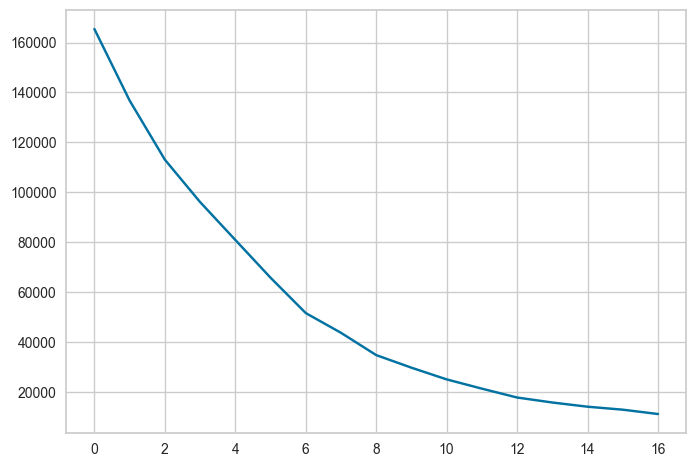

In [89]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=150)
    kmeans.fit(df_transform)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

In [90]:
# Silhouette analysis
range_n_clusters = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_transform)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_transform, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=3, the silhouette score is 0.8043115203590738
For n_clusters=4, the silhouette score is 0.78397883857269
For n_clusters=5, the silhouette score is 0.7839525870152981
For n_clusters=6, the silhouette score is 0.7329110155511229
For n_clusters=7, the silhouette score is 0.7510555488916059
For n_clusters=8, the silhouette score is 0.7538746630781472
For n_clusters=9, the silhouette score is 0.7391409784064555
For n_clusters=10, the silhouette score is 0.6950467570566538
For n_clusters=11, the silhouette score is 0.6990292319871652
For n_clusters=12, the silhouette score is 0.6872285741440431
For n_clusters=13, the silhouette score is 0.7103669912460666
For n_clusters=14, the silhouette score is 0.6169030627898723
For n_clusters=15, the silhouette score is 0.5052324060710927
For n_clusters=16, the silhouette score is 0.5050317410000534
For n_clusters=17, the silhouette score is 0.6517339793141962
For n_clusters=18, the silhouette score is 0.6312280179131856
For n_clusters=19

In [91]:
from sklearn import metrics

print(metrics.calinski_harabasz_score(df_transform, cluster_labels))

219.06300304493743


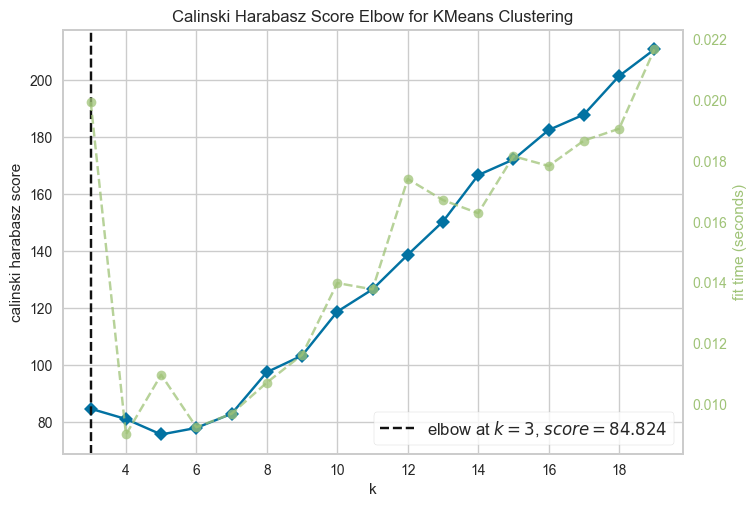

<AxesSubplot: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [92]:
# Calinski Harabasz Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(3,20),metric='calinski_harabasz', timings= True)
visualizer.fit(df_transform)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [93]:
from sklearn.metrics import davies_bouldin_score

print(davies_bouldin_score(df_transform, cluster_labels))

0.40127254439917504


In [94]:
# final model

kmeans = KMeans(n_clusters=12, max_iter=100, random_state=202).fit(df_transform)
kmeans
#kmeans.fit(umap_data)

KMeans(max_iter=100, n_clusters=12, random_state=202)

In [95]:
kmeans.labels_

array([ 4,  4,  0,  4,  4,  4,  4,  4,  4,  4,  7,  5,  0,  4,  4,  4,  4,
        4,  9,  0,  4,  4,  4,  4,  4,  4,  4,  0,  4,  0,  4,  0,  1, 11,
        4,  2,  4,  0,  4,  1,  4,  4,  4,  4,  4,  4,  4,  4,  8,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  8,  4,  4,  4,  4,  4,  3,  4,  0,  6, 10,  4,  4,
        4,  4,  4,  4,  8,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  0,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  0,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4],
      dtype=int32)

In [96]:
# assign the label

data_f['Cluster_Id'] = kmeans.labels_
#result_data['Clusters_Id'] = kmeans.labels_
data_f.head(5)
#topic_df['Cluster_Id'] = kmeans.labels_
#topic_df.head()
#country_df['Cluster_Id'] = kmeans.labels_
#country_df.head(5)


action_type                                             \
action_month       Apr-21 Feb-21 Jan-21 Jun-21 Mar-21 May-21 Algeria   
individual_id                                                          
91743                   0      0      3      0      0      0       0   
219291                  4      0      0      0     12      4       0   
308143                 34     27     67     12     64     15       0   
329275                  0      0      0      0      2      0       0   
360032                  0      0      4      0      7      0       0   

                                                     ...  \
action_month  Antigua and Barbuda Australia Austria  ...   
individual_id                                        ...   
91743                           0         0       0  ...   
219291                          0         0       0  ...   
308143                          0         4       0  ...   
329275                          0         0       0  ...   
360032                          0         0       0  ...   

                                                                             \
action_month  Media, Telecoms, IT, Entertainment_s Non subscriber Privacy_s   
individual_id                                                                 
91743                                            0              0         0   
219291                                           0              1         0   
308143                                           0              1         0   
329275                                           0              0         0   
360032                                           0              1         0   

                                                                            \
action_month  Real Estate and Construction_s Strategy_s Tax_s Technology_s   
individual_id                                                                
91743                                      0          0     1            0   
219291                                     0          0     0            0   
308143                                     0          0     0            0   
329275                                     0          0     0            0   
360032                                     0          0     0            0   

                                              Cluster_Id  
action_month  Transport_s Wealth Management_s             
individual_id                                             
91743                   0                   0          4  
219291                  0                   0          4  
308143                  0                   0          0  
329275                  0                   0          4  
360032                  0                   0          4  

[5 rows x 185 columns]

In [97]:
data_f.shape

(153, 185)

In [98]:
data_f.dtypes

             action_month       
action_type  Apr-21                 int64
             Feb-21                 int64
             Jan-21                 int64
             Jun-21                 int64
             Mar-21                 int64
                                    ...  
             Tax_s                  int64
             Technology_s           int64
             Transport_s            int64
             Wealth Management_s    int64
Cluster_Id                          int32
Length: 185, dtype: object

In [99]:
data_f.to_csv('clusterlabeled.csv', )

In [100]:
data_f.columns.value_counts()

(action_type, Apr-21)                                  1
(action_type, Privacy)                                 1
(action_type, Information Technology and Telecoms)     1
(action_type, Insolvency/Bankruptcy/Re-structuring)    1
(action_type, Insurance)                               1
                                                      ..
(action_type, Netherlands)                             1
(action_type, New Zealand)                             1
(action_type, Nigeria)                                 1
(action_type, Norway)                                  1
(Cluster_Id, )                                         1
Length: 185, dtype: int64

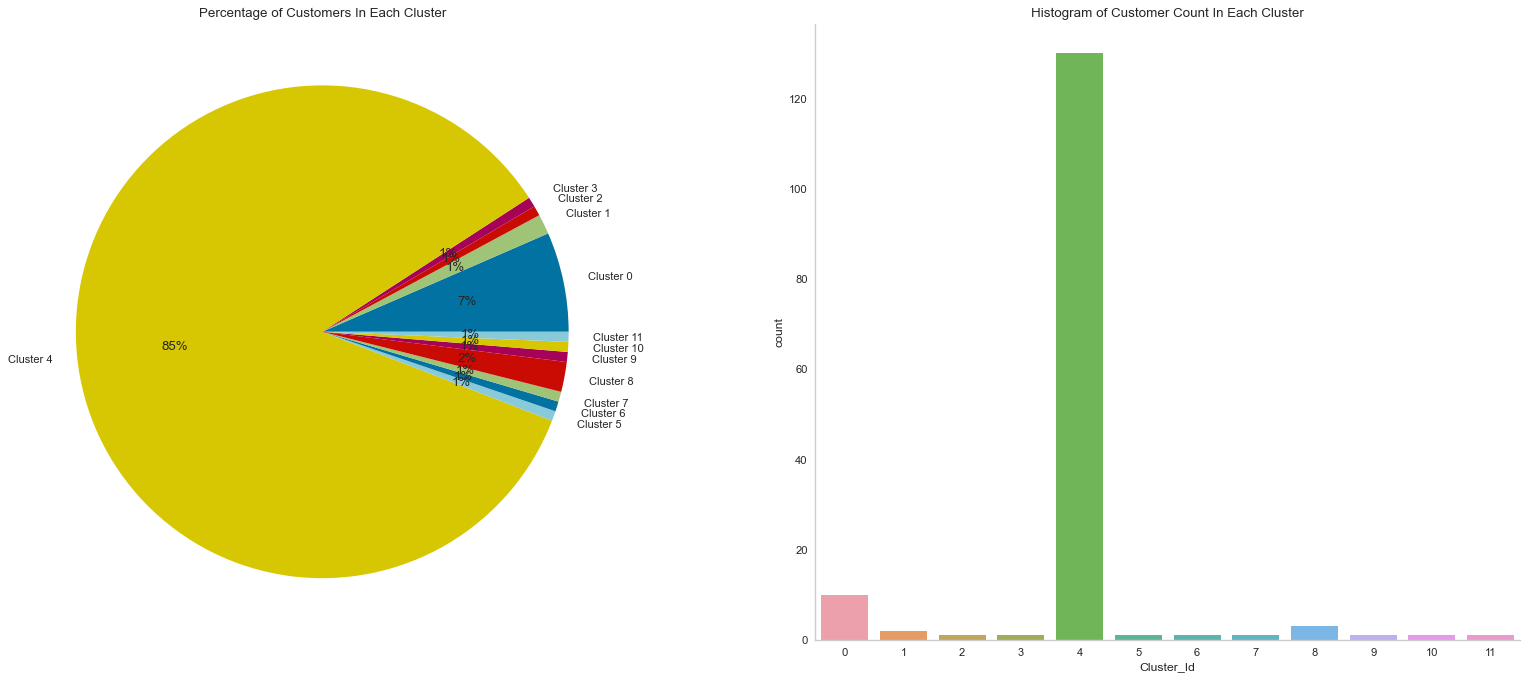

<Figure size 800x550 with 0 Axes>

In [102]:
#define labels
labels = ['Cluster 0','Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5','Cluster 6', 'Cluster 7',
         'Cluster 8','Cluster 9','Cluster 10', 'Cluster 11']
counts= []

#compute counts
for i in range(12):
  counts.append(len(data_f[data_f["Cluster_Id"]==i]))

plt.figure(figsize=(25, 10), dpi=80)
plt.rcParams.update({'axes.grid': False})

#pie plot
ax1 = plt.subplot2grid((1,2),(0,0))
ax1.set_title("Percentage of Customers In Each Cluster")
plt.pie(counts, labels = labels, autopct='%.0f%%')

#bar plot
ax1 = plt.subplot2grid((1,2), (0, 1))
ax1.set_title("Histogram of Customer Count In Each Cluster")
sns.countplot(x=data_f["Cluster_Id"], alpha=.9, ax=ax1)
sns.despine()

plt.show()
plt.savefig('Cluster12.png')

In [103]:
# Import the primary_data 
cluster_left = pd.read_csv('months_data.csv',encoding='unicode_escape')
# left = pd.read_csv('primary_dataset.csv',encoding='unicode_escape')

#cluster_left. rename(columns={'ï»¿action_date':'action_date'}, inplace=True) # rename action_date from 'ï»¿action_date' to 'action_date'
#df.drop(columns=['B', 'C'])
#df2 = df.drop(df.columns[[0, 1, 2]],axis = 1)
# preview of the dataset
cluster_left.head(5)

,Unnamed: 0,action_date,action_month,article_id,article_country_id,article_country,topic_id,topic_desc,action_type,individual_id,individual_country_id,individual_country,master_company_industry_id,master_company_industry
0,0,12/05/2021 18:46,May-21,195166,223,UK,20,Strategy,Web Article View,1130774,223,UK,3,Aerospace & Defence
1,1,12/05/2021 18:46,May-21,195166,223,UK,21,Transport,Web Article View,1130774,223,UK,3,Aerospace & Defence
2,2,11/01/2021 11:20,Jan-21,849316,222,United Arab Emirates,21,Transport,Web Article View,1130774,223,UK,3,Aerospace & Defence
3,3,11/01/2021 11:20,Jan-21,849316,222,United Arab Emirates,18,Tax,Web Article View,1130774,223,UK,3,Aerospace & Defence
4,4,02/02/2021 5:36,Feb-21,771260,161,Oman,21,Transport,Web Article View,1130774,223,UK,3,Aerospace & Defence


In [104]:
cluster_l = cluster_left[['action_date','action_month','article_id','article_country','topic_desc','action_type','individual_id',
                          'individual_country','master_company_industry']]
                          
                          
                          
cluster_l.head(5)

,action_date,action_month,article_id,article_country,topic_desc,action_type,individual_id,individual_country,master_company_industry
0,12/05/2021 18:46,May-21,195166,UK,Strategy,Web Article View,1130774,UK,Aerospace & Defence
1,12/05/2021 18:46,May-21,195166,UK,Transport,Web Article View,1130774,UK,Aerospace & Defence
2,11/01/2021 11:20,Jan-21,849316,United Arab Emirates,Transport,Web Article View,1130774,UK,Aerospace & Defence
3,11/01/2021 11:20,Jan-21,849316,United Arab Emirates,Tax,Web Article View,1130774,UK,Aerospace & Defence
4,02/02/2021 5:36,Feb-21,771260,Oman,Transport,Web Article View,1130774,UK,Aerospace & Defence


In [105]:
# Import the primary_data 
cluster_right = pd.read_csv('cluster.csv',encoding='unicode_escape')
# left = pd.read_csv('primary_dataset.csv',encoding='unicode_escape')

cluster_right. rename(columns={'ï»¿individual_id':'individual_id'}, inplace=True) # rename action_date from 'ï»¿action_date' to 'action_date'

# preview of the dataset
cluster_right.head(5)

,individual_id,Cluster_Id
0,91743,4
1,219291,4
2,308143,0
3,329275,4
4,360032,4


In [106]:
final_data = pd.merge(cluster_l, cluster_right, how="outer")



In [107]:
final_data.head(30)

,action_date,action_month,article_id,article_country,topic_desc,action_type,individual_id,individual_country,master_company_industry,Cluster_Id
0,12/05/2021 18:46,May-21,195166,UK,Strategy,Web Article View,1130774,UK,Aerospace & Defence,0
1,12/05/2021 18:46,May-21,195166,UK,Transport,Web Article View,1130774,UK,Aerospace & Defence,0
2,11/01/2021 11:20,Jan-21,849316,United Arab Emirates,Transport,Web Article View,1130774,UK,Aerospace & Defence,0
3,11/01/2021 11:20,Jan-21,849316,United Arab Emirates,Tax,Web Article View,1130774,UK,Aerospace & Defence,0
4,02/02/2021 5:36,Feb-21,771260,Oman,Transport,Web Article View,1130774,UK,Aerospace & Defence,0
5,13/05/2021 11:57,May-21,885154,Australia,Intellectual Property,Web Article View,1130774,UK,Aerospace & Defence,0
6,09/03/2021 11:07,Mar-21,623576,China,Intellectual Property,Web Article View,1130774,UK,Aerospace & Defence,0
7,04/04/2021 13:51,Apr-21,242626,UK,Employment and HR,Web Article View,1130774,UK,Aerospace & Defence,0
8,23/02/2021 11:19,Feb-21,979224,UK,Employment and HR,Web Article View,1130774,UK,Aerospace & Defence,0
9,30/06/2021 6:35,Jun-21,892976,Vanuatu,Tax,Web Article View,1130774,UK,Aerospace & Defence,0


In [128]:
#final_data.to_csv('check.csv', ) #final_data

In [ ]:
OR

In [108]:
# Import the primary_data 
cluster = pd.read_csv('months_data_updated.csv',encoding='unicode_escape')
# left = pd.read_csv('primary_dataset.csv',encoding='unicode_escape')

#cluster. rename(columns={'ï»¿individual_id':'individual_id'}, inplace=True) # rename action_date from 'ï»¿action_date' to 'action_date'

# preview of the dataset
cluster.head(5)

,Unnamed: 0,action_date,action_month,article_id,article_country_id,article_country,topic_id,topic_desc,action_type,individual_id,cluster id,individual_country_id,individual_country,master_company_industry_id,master_company_industry
0,0,12-05-2021 18:46,May-21,195166,223,UK,20,Strategy,Web Article View,1130774,0,223,UK,3,Aerospace & Defence
1,1,12-05-2021 18:46,May-21,195166,223,UK,21,Transport,Web Article View,1130774,0,223,UK,3,Aerospace & Defence
2,2,11-01-2021 11:20,Jan-21,849316,222,United Arab Emirates,21,Transport,Web Article View,1130774,0,223,UK,3,Aerospace & Defence
3,3,11-01-2021 11:20,Jan-21,849316,222,United Arab Emirates,18,Tax,Web Article View,1130774,0,223,UK,3,Aerospace & Defence
4,4,02-02-2021 05:36,Feb-21,771260,161,Oman,21,Transport,Web Article View,1130774,0,223,UK,3,Aerospace & Defence


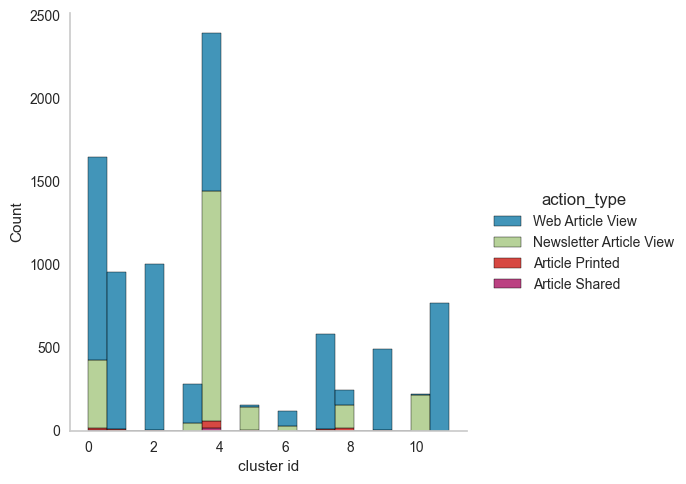

In [109]:
sns.displot(data=cluster, x="cluster id", hue="action_type", multiple="stack")

plt.savefig('action.png')

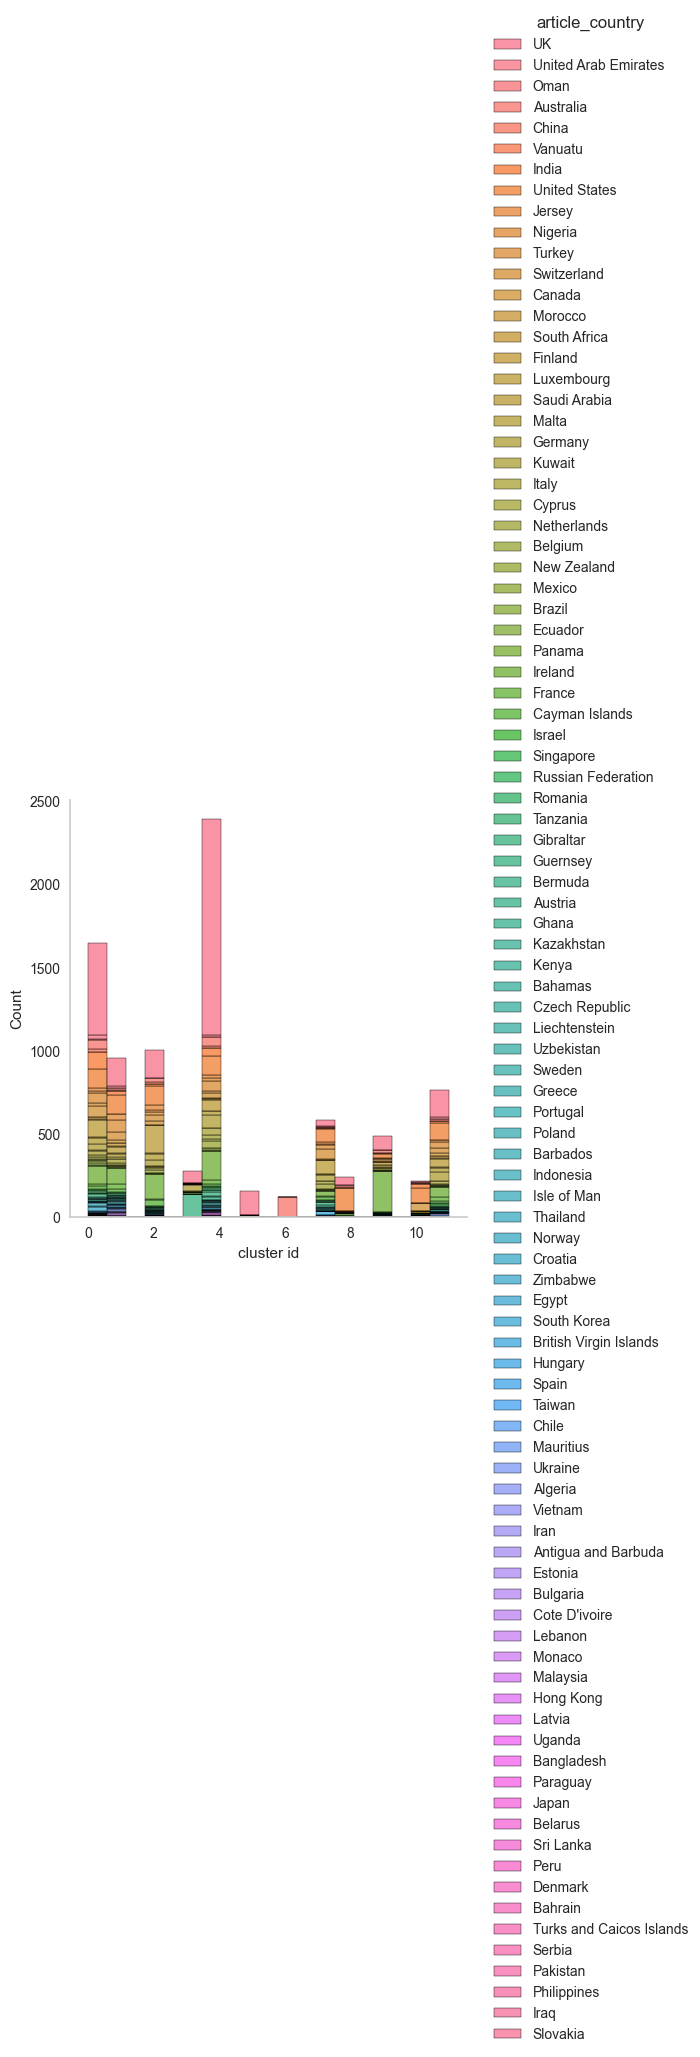

In [110]:
sns.displot(data=cluster, x="cluster id", hue="article_country", multiple="stack")

plt.savefig('country.png')

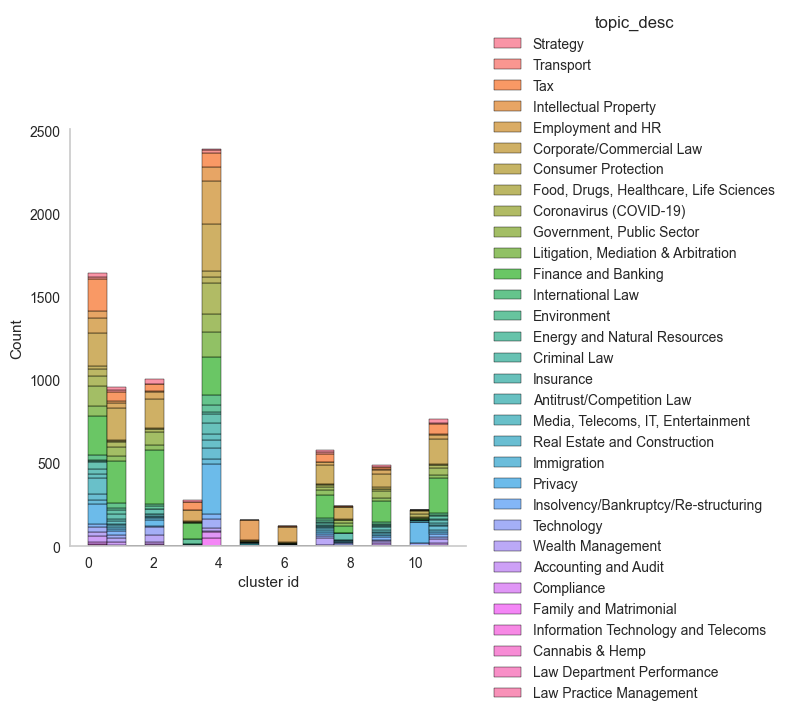

In [112]:
sns.displot(data=cluster, x="cluster id", hue="topic_desc", multiple="stack")

plt.savefig('topic_desc.png')

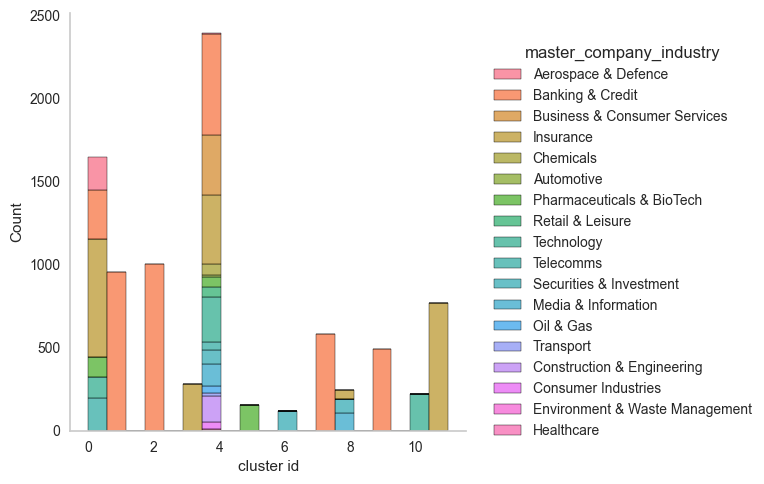

In [113]:
sns.displot(data=cluster, x="cluster id", hue="master_company_industry", multiple="stack")
plt.savefig('industry.png')

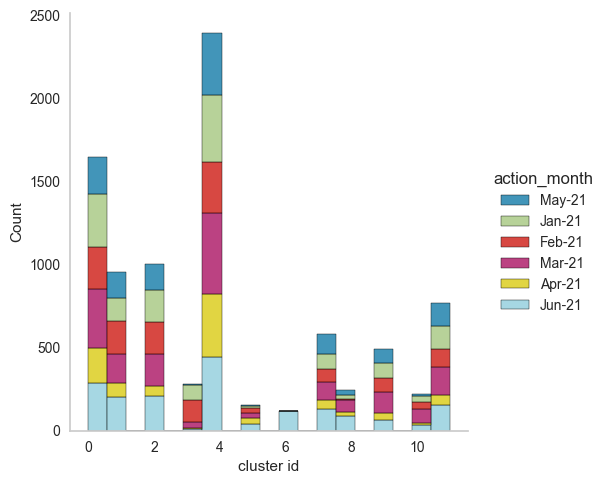

In [114]:
sns.displot(data=cluster, x="cluster id", hue="action_month", multiple="stack")

plt.savefig('month.png')

# Affinity Propagation

In [115]:
#import pandas as pd
#import matplotlib.pyplot as plt
#import numpy as np
from numpy import unique
#from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import OPTICS
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
                                 

In [116]:
model_aff = AffinityPropagation(damping=0.9)
model_aff.fit(df_transform)
#
yhat_aff = model_aff.predict(df_transform)
clusters_aff = unique(yhat_aff)
print("Clusters of Affinity Prop.",clusters_aff)
labels_aff = model_aff.labels_
centroids_aff = model_aff.cluster_centers_

Clusters of Affinity Prop. [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]


In [117]:
score_ap = metrics.silhouette_score(df_transform,labels_aff)

print("Score of AffinityPropagation = ", score_ap)

# cluster 4 = 
# cluster 5 = 
# cluster 7 = 
# cluster 8 =
# cluster 9 = 


Score of AffinityPropagation =  0.3759339625953895


# DBSCAN

In [118]:
from sklearn.cluster import DBSCAN

# Configuring the parameters of the clustering algorithm
dbscan_cluster = DBSCAN(eps=0.3, 
                        min_samples=6)

# Fitting the clustering algorithm
dbscan_cluster.fit(df_transform)

# Adding the results to a new column in the dataframe
#dataframe["cluster"] = dbscan_cluster.labels_

DBSCAN(eps=0.3, min_samples=6)

In [122]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

neighbors = NearestNeighbors(n_neighbors=26)
neighbors_fit = neighbors.fit(df_transform)
distances, indices = neighbors_fit.kneighbors(df_transform)

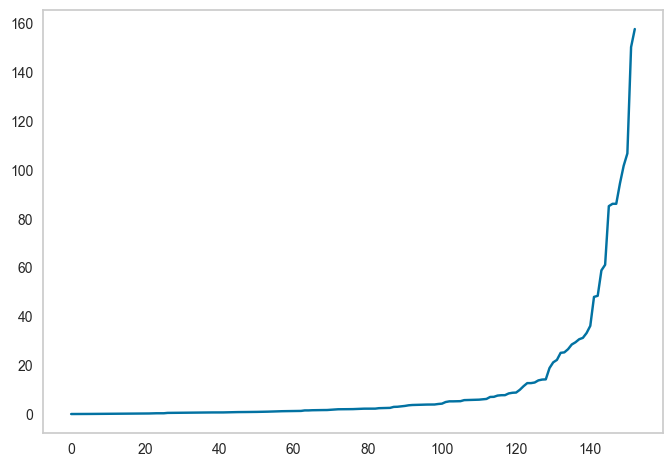

In [123]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.savefig('dbscan.png')

In [127]:
score_db = metrics.silhouette_score(umap_data,labels_db)

print("Score of DBSCAN = ", score_db,"for 11 clusters")

# cluster 4 = 
# cluster 5 = 
# cluster 7 = 
# cluster 8 =
# cluster 9 = 

Score of DBSCAN =  0.18522252 for 11 clusters


# MiniBatchKMeans 

In [128]:
model_mini = MiniBatchKMeans(n_clusters = 8)
model_mini.fit(df_transform)
#
yhat_mini = model_mini.predict(df_transform)
clusters_mini = unique(yhat_mini)
print("Clusters of Mini Batch KMeans.",clusters_mini)
labels_mini = model_mini.labels_
centroids_mini = model_mini.cluster_centers_

Clusters of Mini Batch KMeans. [0 1 2 3 4 5 6 7]


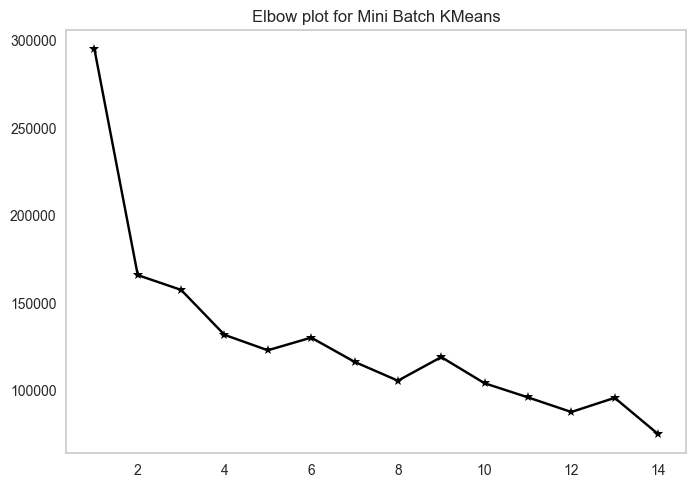

In [133]:
wscc = []
for i in range(1,15): 
    mkmeans = MiniBatchKMeans(n_clusters=i, init="k-means++",random_state=0)
    mkmeans.fit(df_transform)
    wscc.append(mkmeans.inertia_)  

plt.plot(range(1,15),wscc,marker="*",c="black")
plt.title("Elbow plot for Mini Batch KMeans")
plt.savefig('mini.png')

In [130]:
score_mb = metrics.silhouette_score(df_transform,labels_mini)

print("Score of MiniBatchKMeans = ", score_mb,"for 12 clusters")

#     cluster = 4: score= 0.596845
#     cluster = 5: score= 0.5329356
#     cluster = 7: score= 0.5067844
#     cluster = 8: score= 0.6411482/0.64780474


Score of MiniBatchKMeans =  0.40928125361141904 for 12 clusters


## Agglomerative / Hierarchical

In [131]:
model_agg = AgglomerativeClustering(n_clusters=12)
#
yhat_agg = model_agg.fit_predict(df_transform)
clusters_agg = unique(yhat_agg)
print("Clusters of Mini Batch KMeans.",clusters_agg)
labels_agg = model_agg.labels_

Clusters of Mini Batch KMeans. [ 0  1  2  3  4  5  6  7  8  9 10 11]


In [132]:
score_agg = metrics.silhouette_score(df_transform,labels_agg)

print("Score of AgglomerativeClustering = ", score_agg)

# cluster 4 = 
# cluster 5 = 
# cluster 7 = 
# cluster 8 =
# cluster 9 = 


Score of AgglomerativeClustering =  0.6962422423276755
